In [38]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from itertools import combinations

from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms


In [39]:
data_khanka=pd.read_csv('Steppe_Khanka_and rasters_add.csv', sep=',')

In [40]:
data_khanka.head()

gbifID                            datasetKey occurrenceID  \
0  2.311266e+09  e7a2f416-fea5-41bb-8f17-5217fcaa74d7   NSK0000027   
1  2.417592e+09  3942a8dc-9f01-420d-a829-01675dc01c73      5464942   
2  2.417447e+09  3942a8dc-9f01-420d-a829-01675dc01c73      6562119   
3  2.417662e+09  3942a8dc-9f01-420d-a829-01675dc01c73      6562129   
4  1.303784e+09  f9336171-e9a9-4147-b9f6-2d6c133afffd      6562138   

           family                    species infraspecificEpithet   taxonRank  \
0  Amaryllidaceae  Allium anisopodium Ledeb.            argunense  SUBSPECIES   
1  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   
2  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   
3  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   
4  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   

                                      scientificName countryCode  \
0      Allium anisopodium subsp. argunense Peschkova         RUS   
1  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   
2  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   
3  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   
4  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   

   decimalLatitude  ...  current_30arcsec_monthCountByTemp10  \
0        51.467000  ...                                  3.0   
1        39.710000  ...                                  7.0   
2        34.560000  ...                                  7.0   
3        38.280000  ...                                  6.0   
4        36.107933  ...                                  7.0   

  current_30arcsec_minTempWarmest current_30arcsec_maxTempColdest  \
0                            89.0                          -225.0   
1                           197.0                            -6.0   
2                           177.0                            34.0   
3                           169.0                           -15.0   
4                           227.0                            22.0   

  current_30arcsec_growingDegDays5 current_30arcsec_growingDegDays0  \
0                           8257.5                           8257.5   
1                          27310.5                          36760.5   
2                          36868.5                          41340.0   
3                          24759.0                          32778.0   
4                          34668.0                          49846.5   

  current_30arcsec_embergerQ current_30arcsec_continentality  \
0                      29.78                           45.30   
1                      52.20                           30.90   
2                      55.33                           24.70   
3                      32.04                           32.05   
4                      77.90                           26.90   

   current_30arcsec_climaticMoistureIndex  \
0                                   -0.28   
1                                   -0.41   
2                                   -0.47   
3                                   -0.62   
4                                   -0.13   

   current_30arcsec_aridityIndexThornthwaite  current_30arcsec_annualPET  
0                                      38.32                   648.15997  
1                                      70.70                  1033.93994  
2                                      52.28                  1049.94995  
3                                      61.60                  1067.57996  
4                                      37.53                   852.62000  

[5 rows x 73 columns]

In [41]:
data_khanka.shape

(28658, 73)

In [42]:
hanka_only = data_khanka[(data_khanka.decimalLatitude < 45.236845) & (data_khanka.decimalLatitude > 43.797226) & (data_khanka.decimalLongitude> 131.257678) & (data_khanka.decimalLongitude< 131.981854)&(data_khanka.countryCode=='RUS')].copy()

In [43]:
#hanka_only = pd.read_csv('Steppe_Khanka_only_points.csv', sep=',')

In [44]:
hanka_only.shape

(650, 73)

In [45]:
data_prim=pd.read_csv('Steppe_Prim_and rasters_add.csv', sep=',') 

In [46]:
data_prim.shape

(12721, 75)

In [47]:
data_mes=pd.read_csv('Steppe_mes_and rasters_add.csv', sep=',') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15996\2179704881.py:1: DtypeWarning: Columns (5,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data_mes=pd.read_csv('Steppe_mes_and rasters_add.csv', sep=',')


In [48]:
data_mes.shape

(51823, 75)

In [49]:
data_steppe=pd.read_csv('Steppe_steppe_and rasters_add.csv') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15996\391047677.py:1: DtypeWarning: Columns (9,10,14,19,20,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_steppe=pd.read_csv('Steppe_steppe_and rasters_add.csv')


In [50]:
data_steppe.shape

(34725, 77)

In [51]:
data_steppe_checks=pd.read_csv('Steppe_check_rasters.csv') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15996\348706428.py:1: DtypeWarning: Columns (19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data_steppe_checks=pd.read_csv('Steppe_check_rasters.csv')


In [52]:
data_steppe_checks.shape

(20714, 78)

In [53]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

### Khanda dataset:

In [54]:
data_khanka.head()

gbifID                            datasetKey occurrenceID  \
0  2.311266e+09  e7a2f416-fea5-41bb-8f17-5217fcaa74d7   NSK0000027   
1  2.417592e+09  3942a8dc-9f01-420d-a829-01675dc01c73      5464942   
2  2.417447e+09  3942a8dc-9f01-420d-a829-01675dc01c73      6562119   
3  2.417662e+09  3942a8dc-9f01-420d-a829-01675dc01c73      6562129   
4  1.303784e+09  f9336171-e9a9-4147-b9f6-2d6c133afffd      6562138   

           family                    species infraspecificEpithet   taxonRank  \
0  Amaryllidaceae  Allium anisopodium Ledeb.            argunense  SUBSPECIES   
1  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   
2  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   
3  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   
4  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   

                                      scientificName countryCode  \
0      Allium anisopodium subsp. argunense Peschkova         RUS   
1  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   
2  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   
3  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   
4  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   

   decimalLatitude  ...  current_30arcsec_monthCountByTemp10  \
0        51.467000  ...                                  3.0   
1        39.710000  ...                                  7.0   
2        34.560000  ...                                  7.0   
3        38.280000  ...                                  6.0   
4        36.107933  ...                                  7.0   

  current_30arcsec_minTempWarmest current_30arcsec_maxTempColdest  \
0                            89.0                          -225.0   
1                           197.0                            -6.0   
2                           177.0                            34.0   
3                           169.0                           -15.0   
4                           227.0                            22.0   

  current_30arcsec_growingDegDays5 current_30arcsec_growingDegDays0  \
0                           8257.5                           8257.5   
1                          27310.5                          36760.5   
2                          36868.5                          41340.0   
3                          24759.0                          32778.0   
4                          34668.0                          49846.5   

  current_30arcsec_embergerQ current_30arcsec_continentality  \
0                      29.78                           45.30   
1                      52.20                           30.90   
2                      55.33                           24.70   
3                      32.04                           32.05   
4                      77.90                           26.90   

   current_30arcsec_climaticMoistureIndex  \
0                                   -0.28   
1                                   -0.41   
2                                   -0.47   
3                                   -0.62   
4                                   -0.13   

   current_30arcsec_aridityIndexThornthwaite  current_30arcsec_annualPET  
0                                      38.32                   648.15997  
1                                      70.70                  1033.93994  
2                                      52.28                  1049.94995  
3                                      61.60                  1067.57996  
4                                      37.53                   852.62000  

[5 rows x 73 columns]

### Prim dataset

In [55]:
data_prim.head()

gbifID                            datasetKey  \
0  3464835138  4d1b5fed-e12f-48e8-94cb-88cf80115dd1   
1  3464882136  4d1b5fed-e12f-48e8-94cb-88cf80115dd1   
2  2382490292  54f946aa-2ca9-4a51-9ee5-011219e0381e   
3  2382490309  54f946aa-2ca9-4a51-9ee5-011219e0381e   
4  2570621591  0eacbbfa-45b9-41dc-b7e3-1f0773ce1477   

                                      occurrenceID      family  \
0       urn:lsid:biocol.org:col:15550:16:0119:0414  Asteraceae   
1       urn:lsid:biocol.org:col:15550:16:0495:0336  Asteraceae   
2                 https://brnu.jacq.org/BRNU581205  Asteraceae   
3                 https://brnu.jacq.org/BRNU581206  Asteraceae   
4  Flora_of_Siberia_2007_Vol_13_map_196_locality_1  Asteraceae   

                                       species infraspecificEpithet  \
0  Crepidiastrum tenuifolium (Willd.) Sennikov              altaica   
1  Crepidiastrum tenuifolium (Willd.) Sennikov              altaica   
2  Crepidiastrum tenuifolium (Willd.) Sennikov              altaica   
3  Crepidiastrum tenuifolium (Willd.) Sennikov              altaica   
4  Crepidiastrum tenuifolium (Willd.) Sennikov           tenuifolia   

    taxonRank                                     scientificName countryCode  \
0  SUBSPECIES  Youngia tenuifolia subsp. altaica Babc. & Steb...         RUS   
1  SUBSPECIES  Youngia tenuifolia subsp. altaica Babc. & Steb...         RUS   
2  SUBSPECIES  Youngia tenuifolia subsp. altaica Babc. & Steb...         RUS   
3  SUBSPECIES  Youngia tenuifolia subsp. altaica Babc. & Steb...         RUS   
4  SUBSPECIES               Youngia tenuifolia subsp. tenuifolia         RUS   

   decimalLatitude  ...  current_30arcsec_monthCountByTemp10  \
0         51.12980  ...                                  5.0   
1         51.20270  ...                                  5.0   
2         50.40139  ...                                  5.0   
3         50.51586  ...                                  5.0   
4         53.95200  ...                                  5.0   

   current_30arcsec_minTempWarmest  current_30arcsec_maxTempColdest  \
0                            119.0                            -93.0   
1                            113.0                            -99.0   
2                            118.0                           -108.0   
3                            123.0                           -106.0   
4                            127.0                           -114.0   

  current_30arcsec_growingDegDays5 current_30arcsec_growingDegDays0  \
0                          10957.5                          16485.0   
1                          10440.0                          15487.5   
2                          10785.0                          16243.5   
3                          11152.5                          16957.5   
4                          10792.5                          15939.0   

  current_30arcsec_embergerQ current_30arcsec_continentality  \
0                      51.39                           32.75   
1                      53.12                           32.70   
2                      30.70                           33.85   
3                      30.45                           34.15   
4                      40.60                           35.00   

  current_30arcsec_climaticMoistureIndex  \
0                                  -0.14   
1                                  -0.09   
2                                  -0.48   
3                                  -0.49   
4                                  -0.25   

  current_30arcsec_aridityIndexThornthwaite  current_30arcsec_annualPET  
0                                     42.63                   737.26001  
1                                     39.21                   714.76001  
2                                     52.58                   725.84998  
3                                     53.33                   740.52002  
4                                     47.11                   680.77002  

[5 rows x 75 columns]

### Steppe dataset

In [56]:
data_steppe.head()

gbifID                            datasetKey occurrenceID  \
0  4045462570  4515e736-fa02-44ee-9808-bf89445104fe      9663470   
1  4045444803  4515e736-fa02-44ee-9808-bf89445104fe      9402440   
2  4045243421  4515e736-fa02-44ee-9808-bf89445104fe      6529847   
3  4044826650  4515e736-fa02-44ee-9808-bf89445104fe      9663462   
4  4044826649  4515e736-fa02-44ee-9808-bf89445104fe      9663451   

          family                     species infraspecificEpithet taxonRank  \
0  Amaranthaceae  Bassia prostrata (L.) Beck            canescens   VARIETY   
1  Amaranthaceae  Bassia prostrata (L.) Beck            canescens   VARIETY   
2  Amaranthaceae  Bassia prostrata (L.) Beck            canescens   VARIETY   
3  Amaranthaceae  Bassia prostrata (L.) Beck            canescens   VARIETY   
4  Amaranthaceae  Bassia prostrata (L.) Beck            canescens   VARIETY   

                         scientificName countryCode decimalLatitude  ...  \
0  Kochia prostrata var. canescens Moq.         CHN           44.21  ...   
1  Kochia prostrata var. canescens Moq.         CHN            43.8  ...   
2  Kochia prostrata var. canescens Moq.         CHN           40.93  ...   
3  Kochia prostrata var. canescens Moq.         CHN            44.3  ...   
4  Kochia prostrata var. canescens Moq.         CHN           44.43  ...   

  current_30arcsec_maxTempColdest  current_30arcsec_growingDegDays5  \
0                           -63.0                           23877.0   
1                           -82.0                           25452.0   
2                           -30.0                           20989.5   
3                           -74.0                           29578.5   
4                          -103.0                           29316.0   

   current_30arcsec_growingDegDays0 current_30arcsec_embergerQ  \
0                           27348.0                       7.74   
1                           25452.0                      17.14   
2                           24372.0                      16.16   
3                           38758.5                      10.48   
4                           34020.0                      10.58   

  current_30arcsec_continentality current_30arcsec_climaticMoistureIndex  \
0                           36.25                                  -0.89   
1                           37.00                                  -0.75   
2                           28.25                                  -0.80   
3                           38.35                                  -0.86   
4                           40.45                                  -0.86   

  current_30arcsec_aridityIndexThornthwaite current_30arcsec_annualPET  \
0                                     89.08                  979.66998   
1                                     76.88                  934.01001   
2                                     80.31                  939.57001   
3                                     86.21                 1058.62000   
4                                     86.65                 1058.44995   

  Unnamed: 75 Unnamed: 76  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  

[5 rows x 77 columns]

### Mesophites dataset (mes)

In [57]:
data_mes.head()

gbifID                            datasetKey  \
0  3881342533  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
1  3881442492  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
2  3881672504  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
3  3923591598  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
4  3915607719  50c9509d-22c7-4a22-a47d-8c48425ef4a7   

                                        occurrenceID    family  \
0  https://www.inaturalist.org/observations/12648...  Apiaceae   
1  https://www.inaturalist.org/observations/12648...  Apiaceae   
2  https://www.inaturalist.org/observations/12648...  Apiaceae   
3  https://www.inaturalist.org/observations/13256...  Apiaceae   
4  https://www.inaturalist.org/observations/13665...  Apiaceae   

                         species infraspecificEpithet taxonRank  \
0  Bupleurum komarovianum Lincz.                  NaN   SPECIES   
1  Bupleurum komarovianum Lincz.                  NaN   SPECIES   
2  Bupleurum komarovianum Lincz.                  NaN   SPECIES   
3  Bupleurum komarovianum Lincz.                  NaN   SPECIES   
4  Bupleurum komarovianum Lincz.                  NaN   SPECIES   

                      scientificName countryCode  decimalLatitude  ...  \
0  Bupleurum komarovianum O.A.Lincz.         RUS        44.569003  ...   
1  Bupleurum komarovianum O.A.Lincz.         RUS        44.339847  ...   
2  Bupleurum komarovianum O.A.Lincz.         RUS        44.634446  ...   
3  Bupleurum komarovianum O.A.Lincz.         RUS        42.460158  ...   
4  Bupleurum komarovianum O.A.Lincz.         RUS        43.752005  ...   

   current_30arcsec_monthCountByTemp10  current_30arcsec_minTempWarmest  \
0                                  4.0                            139.0   
1                                  5.0                            161.0   
2                                  4.0                            130.0   
3                                  NaN                              NaN   
4                                  4.0                            147.0   

   current_30arcsec_maxTempColdest current_30arcsec_growingDegDays5  \
0                            -94.0                          13320.0   
1                            -62.0                          19278.0   
2                           -111.0                           9637.5   
3                              NaN                              NaN   
4                            -84.0                          13887.0   

  current_30arcsec_growingDegDays0 current_30arcsec_embergerQ  \
0                          16201.5                      70.14   
1                          19278.0                      67.54   
2                          14973.0                      71.67   
3                              NaN                        NaN   
4                          16968.0                      80.04   

  current_30arcsec_continentality current_30arcsec_climaticMoistureIndex  \
0                           32.05                                   0.15   
1                           30.80                                   0.02   
2                           32.85                                   0.21   
3                             NaN                                    NaN   
4                           31.15                                   0.23   

  current_30arcsec_aridityIndexThornthwaite  current_30arcsec_annualPET  
0                                     20.44                   666.88000  
1                                     21.43                   724.78998  
2                                     14.34                   643.08002  
3                                       NaN                         NaN  
4                                     15.97                   666.79999  

[5 rows x 75 columns]

In [58]:
feature_columns = ['URB_2000', 'NVG_2000', 'GRS_2000',
       'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2',
       'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr',
       'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17',
       'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14',
       'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11',
       'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8',
       'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5',
       'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2',
       'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri',
       'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex',
       'current_30arcsec_PETWettestQuarter',
       'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality',
       'current_30arcsec_PETDriestQuarter',
       'current_30arcsec_PETColdestQuarter',
       'current_30arcsec_monthCountByTemp10',
       'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest',
       'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0',
       'current_30arcsec_embergerQ', 'current_30arcsec_continentality',
       'current_30arcsec_climaticMoistureIndex',
       'current_30arcsec_aridityIndexThornthwaite',
       'current_30arcsec_annualPET']

In [59]:
def process_dfs(*dfs):
    allowed_columns = ['species', 'countryCode', 'decimalLatitude', 'decimalLongitude'] + feature_columns
    processed_dfs = []
    for df in dfs:
        df.species = df.species.map(lambda x: ' '.join(map(str.strip, x.split()[:2])))
        df.species = df.species.map(lambda x: x.replace('Pulsatilla dahurica', 'Pulsatilla davurica'))
        _ = df.loc[:, feature_columns].apply(pd.to_numeric, errors='coerce').dropna()
        s = np.abs(stats.zscore(_.values))
        s = s[:,~np.isnan(s).any(axis=0)]
        _=_[(s < 3).all(axis=1)]
        df = df.loc[_.index]
        processed_dfs.append(df.loc[:, allowed_columns])
    return processed_dfs

In [60]:
data_khanka, data_prim, data_mes, data_steppe,hanka_only, data_steppe_checks=process_dfs(data_khanka, data_prim, data_mes, data_steppe,hanka_only, data_steppe_checks)

In [61]:
data_prim.species.value_counts()

Sabulina verna               5573
Thalictrum foetidum          1846
Crepidiastrum tenuifolium    1006
Braya humilis                 788
Thalictrum petaloideum        570
Clausia aprica                474
Carex macroprophylla          276
Name: species, dtype: int64

In [62]:
data_khanka.species.value_counts()

Carex pediformis                2246
Orostachys spinosa              1750
Nepeta multifida                1194
Polygala sibirica               1148
Pulsatilla turczaninovii         900
Helictochloa hookeri             876
Iris humilis                     817
Carex duriuscula                 810
Patrinia rupestris               794
Bupleurum scorzonerifolium       769
Ephedra monosperma               663
Rhaponticum uniflorum            628
Klasea centauroides              611
Allium anisopodium               594
Artemisia laciniata              591
Polygala tenuifolia              583
Lespedeza juncea                 566
Clematis hexapetala              554
Carex korshinskyi                534
Scutellaria baicalensis          470
Ulmus macrocarpa                 457
Stipa baicalensis                441
Filifolium sibiricum             382
Adenophora stenanthina           323
Leontopodium leontopodioides     322
Prunus sibirica                  308
Cleistogenes kitagawae           279
E

In [63]:
data_mes.species.value_counts()

Trifolium lupinaster          2871
Arundinella hirta             2715
Viola mandshurica             2241
Patrinia scabiosifolia        2144
Spodiopogon sibiricus         2023
Flueggea suffruticosa         1724
Hemerocallis minor            1629
Artemisia gmelinii            1554
Vicia amoena                  1479
Kitagawia terebinthacea       1309
Artemisia scoparia            1241
Thesium chinense              1225
Paeonia lactiflora            1039
Platycodon grandiflorus        886
Dictamnus dasycarpus           776
Pulsatilla cernua              756
Iris uniflora                  708
Anthoxanthum glabrum           685
Silene repens                  628
Elymus gmelinii                617
Vincetoxicum changqinianum     559
Cotoneaster laxiflorus         534
Lithospermum erythrorhizon     475
Lilium concolor                470
Saussurea pulchella            409
Veronica linariifolia          369
Potentilla flagellaris         365
Dontostemon dentatus           365
Viola dissecta      

In [64]:
data_steppe.shape

(27048, 58)

In [65]:
data_steppe.species.value_counts()

Artemisia frigida            6167
Linum perenne                2099
Bassia prostrata             1709
Goniolimon speciosum         1254
Delphinium grandiflorum      1121
Potentilla acaulis           1039
Achnatherum sibiricum        1000
Eremogone capillaris          976
Stellaria dichotoma           792
Alyssum lenense               770
Caragana pygmaea              609
Leymus chinensis              600
Phlojodicarpus sibiricus      568
Stipa krylovii                533
Physochlaina physaloides      512
Allium tenuissimum            505
Oxytropis oxyphylla           480
Stellera chamaejasme          464
Oxytropis myriophylla         460
Androsace incana              442
Heteropappus altaicus         387
Allium bidentatum             361
Bupleurum bicaule             348
Iris dichotoma                340
Thalictrum squarrosum         284
Saussurea salicifolia         277
Astragalus melilotoides       262
Persicaria angustifolia       230
Corispermum declinatum        213
Cymbaria dauri

In [66]:
data_steppe_checks.species.value_counts()

Lappula squarrosa          10524
Axyris amaranthoides         959
Sophora flavescens           794
Orostachys malacophylla      499
Pulsatilla davurica          366
Gentiana squarrosa           363
Gueldenstaedtia verna        266
Astragalus davuricus         138
Iris oxypetala               125
Name: species, dtype: int64

# LDA data preparation

In [67]:
def prepare_classification_data(*dfs, features=feature_columns):
    X = []
    y = []
    for ind, df in enumerate(dfs):
        _ = df.loc[:, features]
        _ = _.sample(frac=0.1)
        X.append(_)
        y+=[ind] * len(_)
    return pd.concat(X, axis=0).values, np.array(y)

In [68]:
X, y = prepare_classification_data(data_khanka, data_prim, data_mes, data_steppe,hanka_only) 

In [69]:
X.shape

(9699, 54)

### y -- переменная, отражающая принадлежность набору данных -- их всего здесь 5;

In [70]:
y.shape

(9699,)

In [71]:
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from IPython.core.display import HTML, display_html

In [72]:
def analyze_datasets(datasets, features=feature_columns, n_components=2):
    dataset_names = '_'.join(datasets.keys())
    X, y = prepare_classification_data(*datasets.values(), features=features)
    
    if len(datasets) >= 2:
        pca = PCA(n_components=n_components)
        transformed_data = pca.fit_transform(X)
        for col, marker, cl in zip(cycle('rbyck'), cycle('xodv'), range(len(datasets.keys()))):
            choice_inds = np.random.choice(len(X[:, 0]), size=500, replace=False)
            _X = X[choice_inds, :]
            _y =y[choice_inds]
            plt.scatter(transformed_data[y==cl, 0], transformed_data[y==cl, 1], marker=marker, color=col, label=list(datasets.keys())[cl], alpha=0.3)
        plt.legend()
        plt.show()
        display_html(HTML(f'<h3>Explained coef ratio (PCA) for {dataset_names}: {pca.explained_variance_ratio_} </h3>'))
   
    display_html(HTML('<h3>Feature importances of all considered features: </h3>'))
    klf = RandomForestClassifier()
    klf.fit(X, y)
    for name, val in sorted(list(zip(features, klf.feature_importances_)), key=lambda x: x[1], reverse=True):
        print(f"{name} = {val}")
    
    
    display_html(HTML(f'<h3>Recursive feature elimination procedure, selection the most informative features from</h3> {features}'))
    selector = RFECV(klf, step=1, cv=5, verbose=0, n_jobs=6, scoring="balanced_accuracy")
    selector.fit(X, y)
    
    selected_features = np.array(features)[selector.support_]
    
    for feature_name, imp in sorted(zip(selected_features, selector.estimator_.feature_importances_), key=lambda x: x[1], reverse=True): 
        print(f"{feature_name}: {imp}")
    
    display_html(HTML('<h3>Balanced accuracy estimation for the best feature subset: </h3>'))
    klf.fit(X[:, selector.support_], y)
    print(cross_val_score(klf, X[:, selector.support_], y, scoring='balanced_accuracy'))
        
    
    display_html(HTML('<h3>Balanced accuracy estimation for all features in the experiment: </h3>'))
    print(cross_val_score(klf, X, y, cv=5, scoring='balanced_accuracy'))
    
#     for name, df in datasets.items():
#         display_html(HTML(f'<h3>Descriptive measures for: {name}</h3>'))
#         display_html(df.loc[:, features].describe())

    display_html(HTML('<hr>'))



In [73]:
feature_sets={
    'soil': ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7'] + ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000'],
    'WC21': ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14',
    'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8',
    'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2',
    'wc2.1_30s_bio_1', 'wc2.1_30s_elev'],
    'all_features': feature_columns,
}

datasets = {
    'prim': data_prim,
    'khanka':data_khanka,
    'mes': data_mes,
    'steppe': data_steppe,
    'khanka_only': hanka_only,
    #'checks': data_steppe_checks
}


In [74]:
def analyze_all():
    for feature_set_name, features in feature_sets.items():
        
        display_html(HTML(f'<h1>All datasets. Feature set name: {feature_set_name}</h1>'))
        display_html(HTML(f'<h2>datasets: {list(datasets.keys())} </h2>'))
        analyze_datasets(datasets, features=features)
        
        display_html(HTML('<hr>'))
        
        display_html(HTML(f'<h1>Pair analysis.  Feature set name: {feature_set_name}</h1>'))

        all_dataset_combinations = list(combinations(list(datasets.keys()), 2))
        
        for name1, name2 in all_dataset_combinations:
            display_html(HTML(f'<h2>Datasets to compare: {name1}, {name2}</h2>'))
            analyze_datasets({name1: datasets[name1], name2: datasets[name2]}, features=features)
    
        display_html(HTML('<h1>END OF COMPUTATIONS</h1>'))

All datasets. Feature set name: soil

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only']

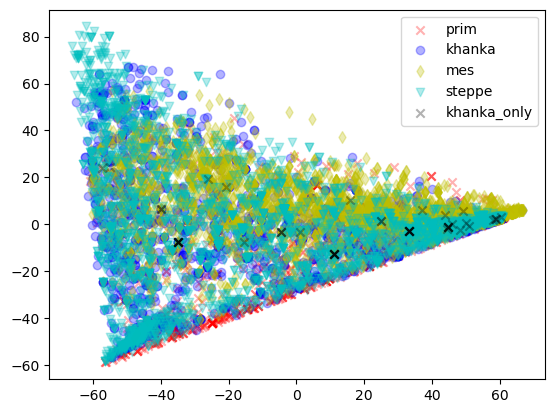

Explained coef ratio (PCA) for prim_khanka_mes_steppe_khanka_only: [0.65903083 0.20806113]

Feature importances of all considered features:

GRS_2000 = 0.15301217343113793
FOR_2000 = 0.13343644458130927
URB_2000 = 0.1326283897045091
NVG_2000 = 0.1115370653818932
CULTRF_2000 = 0.11145263070310182
CULT_2000 = 0.10725537507250053
CULTIR_2000 = 0.06348496925693974
sq7 = 0.05276443401383422
sq3 = 0.04448343955352426
sq1 = 0.02799136291170337
sq2 = 0.02163486786379413
sq4 = 0.01906132409508333
sq5 = 0.0144278105319239
sq6 = 0.006829712898745246


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

GRS_2000: 0.16461447830758488
URB_2000: 0.1399113400453984
FOR_2000: 0.13425514110043332
CULTRF_2000: 0.11884392574823816
NVG_2000: 0.1163307194108593
CULT_2000: 0.10991586309029429
CULTIR_2000: 0.06397463128892755
sq7: 0.055832827871474915
sq3: 0.05400170228482533
sq1: 0.04231937085196384


Balanced accuracy estimation for the best feature subset:

[0.4877849  0.49694062 0.5751481  0.48494177 0.4462353 ]


Balanced accuracy estimation for all features in the experiment:

[0.48838955 0.49900487 0.57959797 0.49394398 0.44661707]


Pair analysis. Feature set name: soil

Datasets to compare: prim, khanka

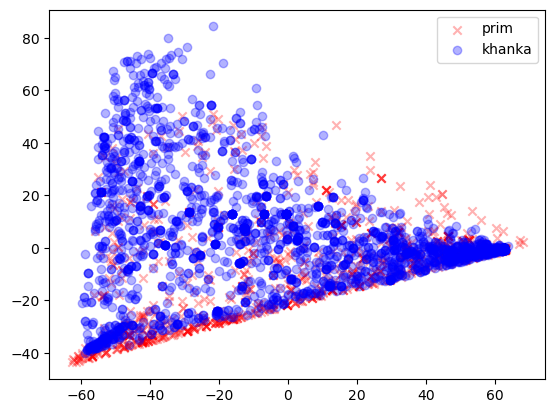

Explained coef ratio (PCA) for prim_khanka: [0.68093799 0.21751699]

Feature importances of all considered features:

GRS_2000 = 0.13566576844094705
URB_2000 = 0.12468289777592555
FOR_2000 = 0.12060907613040996
sq3 = 0.1093334338830064
sq7 = 0.09648294092291973
CULTRF_2000 = 0.08674072964894217
CULT_2000 = 0.08306638742313785
NVG_2000 = 0.07335374768915058
CULTIR_2000 = 0.04990849791133546
sq2 = 0.032022289156780584
sq1 = 0.02632056125879099
sq4 = 0.025280254523588487
sq5 = 0.01901480879935837
sq6 = 0.017518606435706893


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

GRS_2000: 0.13346312003910632
URB_2000: 0.12552143606171323
FOR_2000: 0.1173875163741574
sq3: 0.11631013020251908
sq7: 0.09688631887095679
CULTRF_2000: 0.0852418693389595
CULT_2000: 0.08523160939096591
NVG_2000: 0.07778676376634965
CULTIR_2000: 0.049522692932820085
sq4: 0.031150132278388115
sq2: 0.02833841439405598
sq1: 0.027363872161899647
sq5: 0.025796124188108283


Balanced accuracy estimation for the best feature subset:

[0.78664579 0.80040668 0.77066761 0.7490413  0.77268226]


Balanced accuracy estimation for all features in the experiment:

[0.78034069 0.79092801 0.77066761 0.75125369 0.76715129]


Datasets to compare: prim, mes

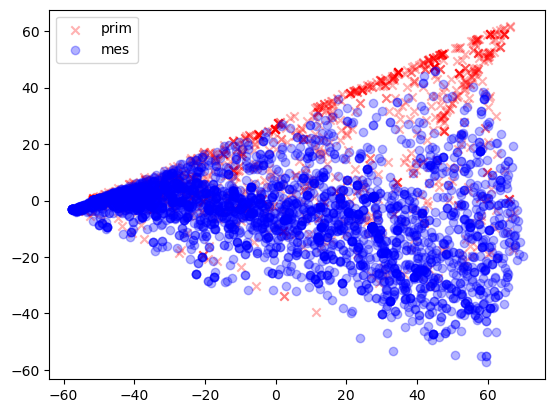

Explained coef ratio (PCA) for prim_mes: [0.68045437 0.16518155]

Feature importances of all considered features:

sq7 = 0.16710188836954273
GRS_2000 = 0.14606014636478076
URB_2000 = 0.09467712602893888
sq3 = 0.08722107388674281
FOR_2000 = 0.08511888771460396
CULT_2000 = 0.08505173548953791
CULTRF_2000 = 0.07864947997861113
CULTIR_2000 = 0.06074094232112428
NVG_2000 = 0.043835019747973075
sq5 = 0.04142412164311851
sq6 = 0.02916563266203728
sq4 = 0.02850762753998858
sq1 = 0.028171025506528374
sq2 = 0.024275292746471708


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

sq7: 0.17705056513222173
GRS_2000: 0.1521906668576554
URB_2000: 0.10746944179115751
FOR_2000: 0.09574642438124938
CULT_2000: 0.09331286963544287
sq3: 0.08739422105542675
CULTRF_2000: 0.08260333352958199
CULTIR_2000: 0.063038016905775
sq5: 0.0563929813387019
NVG_2000: 0.04510697462429935
sq1: 0.039694504748488034


Balanced accuracy estimation for the best feature subset:

[0.8575751  0.83181231 0.84633387 0.81682714 0.85621802]


Balanced accuracy estimation for all features in the experiment:

[0.85925607 0.83487068 0.85313932 0.80185367 0.84939   ]


Datasets to compare: prim, steppe

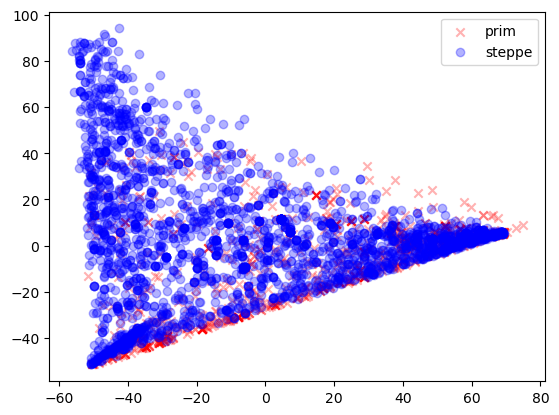

Explained coef ratio (PCA) for prim_steppe: [0.60130064 0.29197428]

Feature importances of all considered features:

GRS_2000 = 0.13644344777264678
FOR_2000 = 0.13203946516182338
URB_2000 = 0.12710792895146703
NVG_2000 = 0.09613399454661875
CULTRF_2000 = 0.09596983641301043
CULT_2000 = 0.09522054870188029
sq7 = 0.08743914169850475
sq3 = 0.08652634453800591
CULTIR_2000 = 0.04755321083346814
sq1 = 0.023414426457549646
sq2 = 0.02295055326224788
sq5 = 0.01979178654189328
sq4 = 0.018617418661398214
sq6 = 0.01079189645948565


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

GRS_2000: 0.13929862570720863
FOR_2000: 0.13173754340169583
URB_2000: 0.12414177255521158
CULT_2000: 0.09573602224950538
NVG_2000: 0.0955349728168697
CULTRF_2000: 0.09413753261073633
sq7: 0.09169837095993957
sq3: 0.08677102014253515
CULTIR_2000: 0.047130401341952316
sq1: 0.025999814763055587
sq2: 0.02214883061487766
sq4: 0.017904070466943214
sq5: 0.0177204163623465
sq6: 0.010040606007122572


Balanced accuracy estimation for the best feature subset:

[0.77502168 0.76253384 0.76935813 0.76487985 0.76143385]


Balanced accuracy estimation for all features in the experiment:

[0.77016408 0.75542483 0.76843392 0.76527154 0.75773699]


Datasets to compare: prim, khanka_only

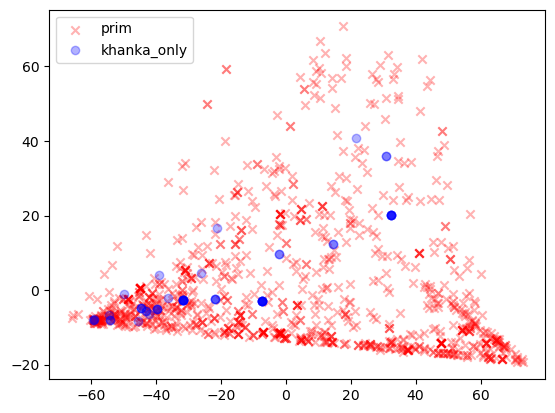

Explained coef ratio (PCA) for prim_khanka_only: [0.75273698 0.15415921]

Feature importances of all considered features:

URB_2000 = 0.17999641661588073
CULT_2000 = 0.1475176921720998
CULTRF_2000 = 0.14112253603609687
FOR_2000 = 0.1343329257757131
GRS_2000 = 0.11269340672141735
sq3 = 0.0624691688285085
sq7 = 0.05418757347560711
CULTIR_2000 = 0.05230235313583559
sq2 = 0.035822346910164955
sq1 = 0.03467803361109917
NVG_2000 = 0.03410943679081594
sq4 = 0.008722258184412553
sq5 = 0.0014378999430490623
sq6 = 0.0006079517992992301


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

URB_2000: 0.29853208503665113
FOR_2000: 0.24770141076272714
GRS_2000: 0.24403032484845255
CULT_2000: 0.20973617935216918


Balanced accuracy estimation for the best feature subset:

[0.86363636 0.84763033 0.95       0.86363636 0.90909091]


Balanced accuracy estimation for all features in the experiment:

[0.86363636 0.85       0.94763033 0.86363636 0.90909091]


Datasets to compare: khanka, mes

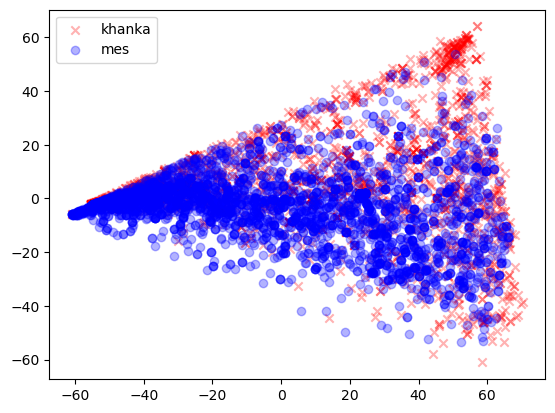

Explained coef ratio (PCA) for khanka_mes: [0.70443806 0.13817215]

Feature importances of all considered features:

GRS_2000 = 0.14466946975484926
URB_2000 = 0.12644847192506412
NVG_2000 = 0.12126725529390787
FOR_2000 = 0.10935757395315762
CULTRF_2000 = 0.10463423558261378
CULT_2000 = 0.0944867262668934
CULTIR_2000 = 0.06302246804969272
sq7 = 0.045132891494079556
sq3 = 0.04070819518346825
sq1 = 0.03651338554604026
sq2 = 0.03278718658016291
sq5 = 0.029903152408975526
sq4 = 0.02835158357270459
sq6 = 0.022717404388390285


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

GRS_2000: 0.18680298956043612
URB_2000: 0.16510259981730083
NVG_2000: 0.1370929396880946
CULTRF_2000: 0.13464884937938154
FOR_2000: 0.1343416678003983
CULT_2000: 0.1263072359469559
sq2: 0.11570371780743254


Balanced accuracy estimation for the best feature subset:

[0.77144128 0.73107584 0.75388179 0.73503326 0.75969227]


Balanced accuracy estimation for all features in the experiment:

[0.76065055 0.72832102 0.75124361 0.72990996 0.76871263]


Datasets to compare: khanka, steppe

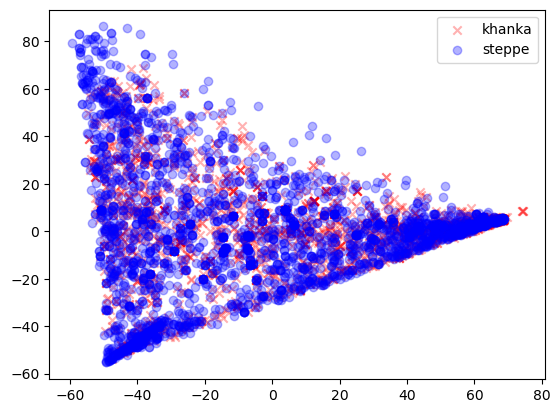

Explained coef ratio (PCA) for khanka_steppe: [0.63820785 0.25579897]

Feature importances of all considered features:

FOR_2000 = 0.16467137384762448
GRS_2000 = 0.16129624438576262
URB_2000 = 0.15058081963437409
CULTRF_2000 = 0.12080735190552418
CULT_2000 = 0.11839666685278548
NVG_2000 = 0.10631506385484776
CULTIR_2000 = 0.06708695423284457
sq7 = 0.022755218258062503
sq1 = 0.022150725658372658
sq3 = 0.02137387089369364
sq4 = 0.017200423592626746
sq2 = 0.01577725164729434
sq5 = 0.007258805717081695
sq6 = 0.004329229519105122


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

FOR_2000: 0.1713203805446417
GRS_2000: 0.16887843832747418
URB_2000: 0.15699811858165913
CULTRF_2000: 0.12203293258980796
CULT_2000: 0.11901135250517852
NVG_2000: 0.10802375120385938
CULTIR_2000: 0.06810213535998995
sq1: 0.03297502498538292
sq7: 0.026330108842428812
sq3: 0.026327757059577416


Balanced accuracy estimation for the best feature subset:

[0.58618913 0.62293279 0.64628613 0.65275154 0.61597764]


Balanced accuracy estimation for all features in the experiment:

[0.59985605 0.62366071 0.65682341 0.65145641 0.62466443]


Datasets to compare: khanka, khanka_only

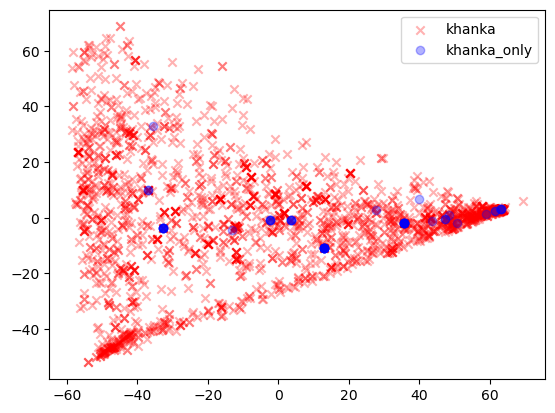

Explained coef ratio (PCA) for khanka_khanka_only: [0.71825554 0.18319816]

Feature importances of all considered features:

URB_2000 = 0.20040005662964255
GRS_2000 = 0.1844053759776518
FOR_2000 = 0.15908979219410702
CULT_2000 = 0.13943378062763612
CULTRF_2000 = 0.12050008083901174
NVG_2000 = 0.03946345515233326
sq2 = 0.03766613983621691
sq1 = 0.03389774853196592
CULTIR_2000 = 0.02818043381374014
sq3 = 0.023978658333128993
sq7 = 0.01960801968019245
sq4 = 0.011142341571247867
sq6 = 0.0012634986171837152
sq5 = 0.0009706181959417312


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

URB_2000: 0.20235997932884942
GRS_2000: 0.17924260192825348
FOR_2000: 0.17404490709875625
CULT_2000: 0.13615786172571392
CULTRF_2000: 0.13525841934861887
sq2: 0.04454973721024382
sq3: 0.036892708840042344
sq1: 0.033077152506965884
CULTIR_2000: 0.0302046043311301
NVG_2000: 0.02821202768142593


Balanced accuracy estimation for the best feature subset:

[0.64557522 0.79668142 0.81485588 0.63303769 0.72283814]


Balanced accuracy estimation for all features in the experiment:

[0.64557522 0.79668142 0.81485588 0.63303769 0.72283814]


Datasets to compare: mes, steppe

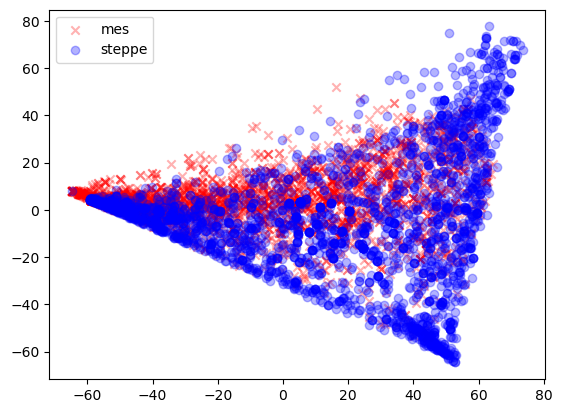

Explained coef ratio (PCA) for mes_steppe: [0.67124249 0.1839187 ]

Feature importances of all considered features:

NVG_2000 = 0.20123054075382543
GRS_2000 = 0.13557075870223945
CULTRF_2000 = 0.11605315716419526
FOR_2000 = 0.10880614900938408
URB_2000 = 0.09717448033260657
CULT_2000 = 0.09600061522790941
CULTIR_2000 = 0.051750701049465754
sq7 = 0.03962566885923082
sq3 = 0.03778029626816493
sq1 = 0.03679562084643217
sq2 = 0.024735061911102973
sq4 = 0.020395757284741696
sq6 = 0.018014416934401808
sq5 = 0.01606677565629964


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

NVG_2000: 0.19692054499098302
GRS_2000: 0.13450766114120657
FOR_2000: 0.11346963082425625
CULTRF_2000: 0.11302474053141784
CULT_2000: 0.09787046497926188
URB_2000: 0.09576367482870414
CULTIR_2000: 0.05305397093861069
sq3: 0.040975007549716294
sq7: 0.04092593135420229
sq1: 0.040381328741876575
sq4: 0.031152509902579516
sq2: 0.02336726640862158
sq5: 0.018587267808563557


Balanced accuracy estimation for the best feature subset:

[0.82511117 0.82344959 0.80523645 0.83406914 0.81291914]


Balanced accuracy estimation for all features in the experiment:

[0.82373566 0.82113014 0.80387686 0.83707729 0.81041765]


Datasets to compare: mes, khanka_only

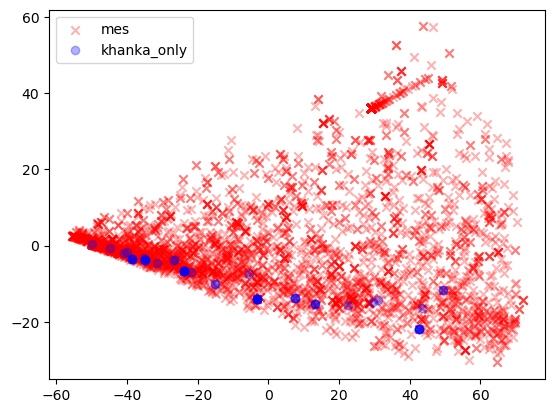

Explained coef ratio (PCA) for mes_khanka_only: [0.73675143 0.10927452]

Feature importances of all considered features:

URB_2000 = 0.18307163462443096
FOR_2000 = 0.18208769891533996
CULT_2000 = 0.16160231617004395
GRS_2000 = 0.16158709771863666
CULTRF_2000 = 0.15794598195794754
sq7 = 0.030835685686962124
sq3 = 0.02960729354218943
sq1 = 0.025898985724561858
sq2 = 0.02448177349798967
CULTIR_2000 = 0.021468388616462466
sq4 = 0.015496401472651283
NVG_2000 = 0.005633828348926181
sq5 = 0.0001503286658458505
sq6 = 0.00013258505801207063


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

FOR_2000: 0.2009984078037791
URB_2000: 0.1866343713845476
GRS_2000: 0.18465673293119686
CULTRF_2000: 0.18290502288057575
CULT_2000: 0.17720143753743325
sq1: 0.035599280696471426
sq7: 0.032004746765995996


Balanced accuracy estimation for the best feature subset:

[0.89449794 0.63498623 0.86157025 0.8161157  0.94862259]


Balanced accuracy estimation for all features in the experiment:

[0.89449794 0.58953168 0.86157025 0.8161157  0.94862259]


Datasets to compare: steppe, khanka_only

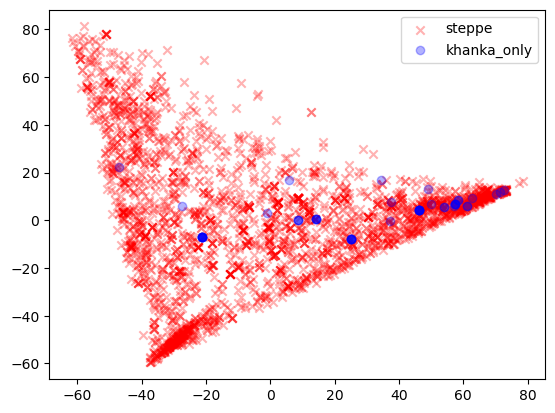

Explained coef ratio (PCA) for steppe_khanka_only: [0.58170799 0.30674556]

Feature importances of all considered features:

URB_2000 = 0.18900884928892914
GRS_2000 = 0.16696487338581148
FOR_2000 = 0.1590978021645239
CULTRF_2000 = 0.13276782544936025
CULT_2000 = 0.12849557192580746
NVG_2000 = 0.04601130738810897
CULTIR_2000 = 0.04401696770949638
sq2 = 0.04190993529108393
sq1 = 0.030489025745012208
sq7 = 0.02574042308874943
sq3 = 0.025205084992719968
sq4 = 0.006724671642770235
sq5 = 0.0018797787819378132
sq6 = 0.0016878831456888289


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

URB_2000: 0.27578719104776206
FOR_2000: 0.2709058199759088
GRS_2000: 0.2625277080274019
CULT_2000: 0.19077928094892724


Balanced accuracy estimation for the best feature subset:

[1.         0.86363636 0.86363636 0.8        0.8       ]


Balanced accuracy estimation for all features in the experiment:

[1.         0.86363636 0.86363636 0.8        0.8       ]


END OF COMPUTATIONS

All datasets. Feature set name: WC21

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only']

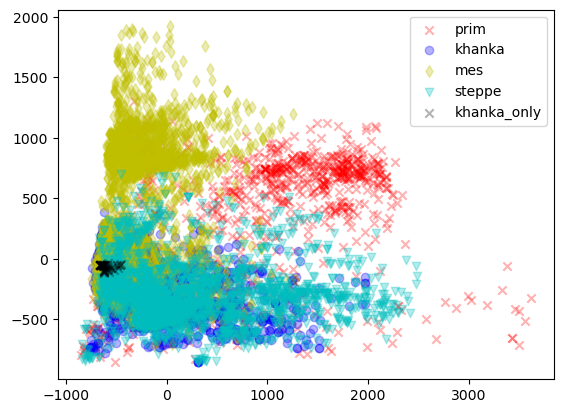

Explained coef ratio (PCA) for prim_khanka_mes_steppe_khanka_only: [0.54838613 0.36783925]

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.08520086692000829
wc2.1_30s_bio_12 = 0.0776055403279213
wc2.1_30s_bio_16 = 0.07206921114742366
wc2.1_30s_bio_13 = 0.06861000644549367
wc2.1_30s_bio_4 = 0.06117460060579736
wc2.1_30s_bio_8 = 0.054641570133138584
wc2.1_30s_bio_1 = 0.05272530364899627
wc2.1_30s_elev = 0.05263153308232643
wc2.1_30s_bio_15 = 0.04971633194212614
wc2.1_30s_bio_10 = 0.04931152040407965
wc2.1_30s_bio_3 = 0.048899005368406766
wc2.1_30s_bio_7 = 0.04078203934426978
wc2.1_30s_bio_19 = 0.04025182541340484
wc2.1_30s_bio_17 = 0.04023180145440591
wc2.1_30s_bio_11 = 0.040155567933142525
wc2.1_30s_bio_9 = 0.03941221887344413
wc2.1_30s_bio_5 = 0.037997076150988435
wc2.1_30s_bio_2 = 0.03775680905226709
wc2.1_30s_bio_6 = 0.03056255169683037
wc2.1_30s_bio_14 = 0.020264620055528763


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_12: 0.10698255762729149
wc2.1_30s_bio_18: 0.10142764146408519
wc2.1_30s_bio_4: 0.10049418432158243
wc2.1_30s_bio_16: 0.09639592388781022
wc2.1_30s_bio_8: 0.08524036410472478
wc2.1_30s_bio_1: 0.07775652821068595
wc2.1_30s_elev: 0.07601426168943257
wc2.1_30s_bio_13: 0.07520035025334453
wc2.1_30s_bio_3: 0.07338760403736512
wc2.1_30s_bio_15: 0.07153272487912608
wc2.1_30s_bio_10: 0.06920019302825454
wc2.1_30s_bio_7: 0.06636766649629705


Balanced accuracy estimation for the best feature subset:

[0.51605607 0.54275008 0.58202001 0.56712473 0.6214408 ]


Balanced accuracy estimation for all features in the experiment:

[0.51682342 0.53939679 0.61703915 0.58924814 0.56114608]


Pair analysis. Feature set name: WC21

Datasets to compare: prim, khanka

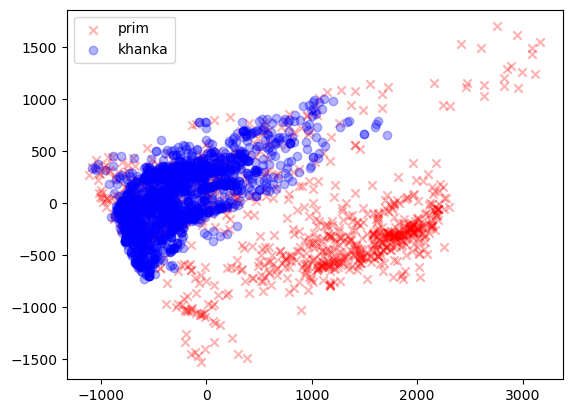

Explained coef ratio (PCA) for prim_khanka: [0.78614172 0.16572144]

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.15299752975528427
wc2.1_30s_bio_4 = 0.10750890956014192
wc2.1_30s_bio_17 = 0.08588501722282263
wc2.1_30s_bio_19 = 0.06846894676247588
wc2.1_30s_bio_14 = 0.058066838096594874
wc2.1_30s_bio_7 = 0.05108798902464177
wc2.1_30s_bio_12 = 0.050833945035337266
wc2.1_30s_bio_9 = 0.04278067885376952
wc2.1_30s_bio_10 = 0.0415353170942667
wc2.1_30s_bio_15 = 0.04111500687619608
wc2.1_30s_bio_2 = 0.03847474909008658
wc2.1_30s_bio_3 = 0.038366346347963126
wc2.1_30s_bio_5 = 0.031706590594816994
wc2.1_30s_elev = 0.031671060111842474
wc2.1_30s_bio_1 = 0.03115175310881424
wc2.1_30s_bio_6 = 0.03099820273234071
wc2.1_30s_bio_18 = 0.025265696440642128
wc2.1_30s_bio_11 = 0.024484089958426252
wc2.1_30s_bio_13 = 0.023883759957856188
wc2.1_30s_bio_16 = 0.02371757337568051


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_8: 0.17511893947162852
wc2.1_30s_bio_4: 0.10313813246889894
wc2.1_30s_bio_19: 0.08551798320542515
wc2.1_30s_bio_14: 0.07890443081676621
wc2.1_30s_bio_17: 0.07097033426047185
wc2.1_30s_bio_7: 0.06860337668891771
wc2.1_30s_bio_15: 0.059320068706220336
wc2.1_30s_bio_12: 0.04574778078573755
wc2.1_30s_bio_3: 0.04110951915587362
wc2.1_30s_elev: 0.040791459509393065
wc2.1_30s_bio_5: 0.03853028619044789
wc2.1_30s_bio_10: 0.03826057995660945
wc2.1_30s_bio_1: 0.03492271798318318
wc2.1_30s_bio_18: 0.0316945895349074
wc2.1_30s_bio_2: 0.031093933985459194
wc2.1_30s_bio_9: 0.028360604946003294
wc2.1_30s_bio_6: 0.027915262334056543


Balanced accuracy estimation for the best feature subset:

[0.81068925 0.82616828 0.81129875 0.83230088 0.83203751]


Balanced accuracy estimation for all features in the experiment:

[0.80736331 0.82410336 0.80560314 0.82787611 0.84233038]


Datasets to compare: prim, mes

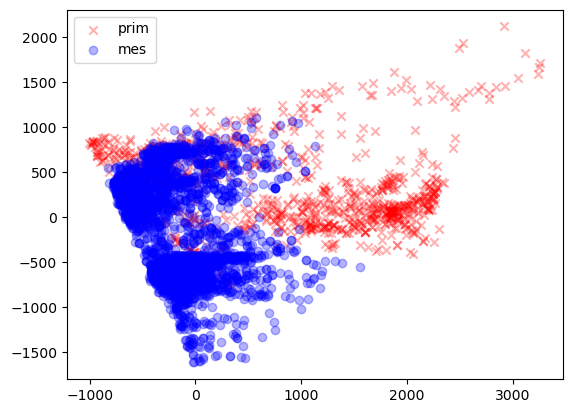

Explained coef ratio (PCA) for prim_mes: [0.56166191 0.36917422]

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.19718212143178251
wc2.1_30s_bio_10 = 0.13877048052525623
wc2.1_30s_bio_5 = 0.11273705003919687
wc2.1_30s_bio_4 = 0.08197099386963277
wc2.1_30s_elev = 0.05310169297003957
wc2.1_30s_bio_7 = 0.05070434580751578
wc2.1_30s_bio_15 = 0.04052134495638169
wc2.1_30s_bio_1 = 0.038199456615036466
wc2.1_30s_bio_18 = 0.033023932775778274
wc2.1_30s_bio_9 = 0.031129337706997863
wc2.1_30s_bio_19 = 0.030881048151735296
wc2.1_30s_bio_3 = 0.02987697909165161
wc2.1_30s_bio_16 = 0.024442040146044123
wc2.1_30s_bio_12 = 0.024065454614518554
wc2.1_30s_bio_11 = 0.02271904020374416
wc2.1_30s_bio_13 = 0.022709538480558664
wc2.1_30s_bio_6 = 0.01807314377206241
wc2.1_30s_bio_14 = 0.017630596567867224
wc2.1_30s_bio_2 = 0.01634344708979069
wc2.1_30s_bio_17 = 0.015917955184409176


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_8: 0.22693807202223523
wc2.1_30s_bio_10: 0.16067191774289524
wc2.1_30s_bio_4: 0.09249799217612512
wc2.1_30s_bio_5: 0.08795390553473217
wc2.1_30s_elev: 0.05113108565734778
wc2.1_30s_bio_15: 0.04790551011501727
wc2.1_30s_bio_7: 0.046841827169664
wc2.1_30s_bio_18: 0.04037141580148553
wc2.1_30s_bio_1: 0.0377368855117215
wc2.1_30s_bio_19: 0.03655017059264575
wc2.1_30s_bio_9: 0.028786743382483687
wc2.1_30s_bio_3: 0.027029935586436647
wc2.1_30s_bio_12: 0.0262459609744567
wc2.1_30s_bio_11: 0.02540038157422763
wc2.1_30s_bio_16: 0.02372725851672761
wc2.1_30s_bio_13: 0.022038546120771524
wc2.1_30s_bio_6: 0.01817239152102654


Balanced accuracy estimation for the best feature subset:

[0.88799564 0.87209667 0.88998015 0.88862579 0.87563951]


Balanced accuracy estimation for all features in the experiment:

[0.89204627 0.86873474 0.89342368 0.89407546 0.87563951]


Datasets to compare: prim, steppe

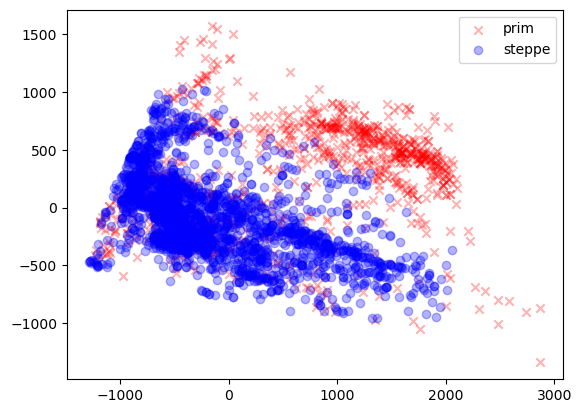

Explained coef ratio (PCA) for prim_steppe: [0.75825276 0.18235438]

Feature importances of all considered features:

wc2.1_30s_bio_17 = 0.10686051743087839
wc2.1_30s_bio_12 = 0.09314741293718656
wc2.1_30s_bio_4 = 0.08403753978529871
wc2.1_30s_bio_7 = 0.08339768342786477
wc2.1_30s_bio_19 = 0.06538932633460802
wc2.1_30s_bio_5 = 0.05588000005031903
wc2.1_30s_bio_8 = 0.05570763151475594
wc2.1_30s_bio_10 = 0.04736521634242623
wc2.1_30s_bio_16 = 0.04430268024442921
wc2.1_30s_bio_14 = 0.04153500829752334
wc2.1_30s_bio_1 = 0.040764414986629645
wc2.1_30s_elev = 0.03681353510488612
wc2.1_30s_bio_3 = 0.03530261502755855
wc2.1_30s_bio_2 = 0.03445233782577167
wc2.1_30s_bio_15 = 0.03315603711212472
wc2.1_30s_bio_9 = 0.03287303028949433
wc2.1_30s_bio_11 = 0.030562304089214846
wc2.1_30s_bio_18 = 0.02949746523887862
wc2.1_30s_bio_6 = 0.025877928149330466
wc2.1_30s_bio_13 = 0.02307731581082084


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_12: 0.1488929929042376
wc2.1_30s_bio_17: 0.09291254480226091
wc2.1_30s_bio_7: 0.06911314135048517
wc2.1_30s_bio_4: 0.06828768181532974
wc2.1_30s_bio_19: 0.05800238469787582
wc2.1_30s_bio_8: 0.050378972580609485
wc2.1_30s_bio_10: 0.047887631388256434
wc2.1_30s_bio_5: 0.04729444479454553
wc2.1_30s_bio_14: 0.04719076162943796
wc2.1_30s_bio_1: 0.04164014916762322
wc2.1_30s_bio_9: 0.03865459227795392
wc2.1_30s_bio_2: 0.03767513222157774
wc2.1_30s_bio_16: 0.03703809664119013
wc2.1_30s_bio_3: 0.036418740370140056
wc2.1_30s_elev: 0.034011190141740116
wc2.1_30s_bio_15: 0.030813866455395387
wc2.1_30s_bio_11: 0.030178249448253897
wc2.1_30s_bio_18: 0.029940566691954135
wc2.1_30s_bio_13: 0.02855619434365819
wc2.1_30s_bio_6: 0.025112666277474528


Balanced accuracy estimation for the best feature subset:

[0.8108996  0.81049662 0.80848175 0.80336678 0.80692281]


Balanced accuracy estimation for all features in the experiment:

[0.8066815  0.8066815  0.81559075 0.80269342 0.79977995]


Datasets to compare: prim, khanka_only

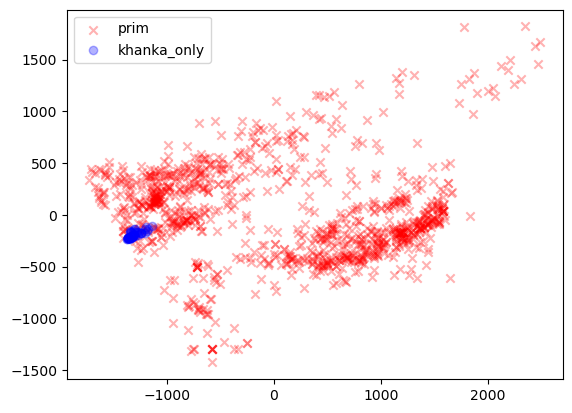

Explained coef ratio (PCA) for prim_khanka_only: [0.81010359 0.15783539]

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.19995554079021957
wc2.1_30s_bio_10 = 0.18389520145112925
wc2.1_30s_elev = 0.10208167721022533
wc2.1_30s_bio_5 = 0.09727406572219978
wc2.1_30s_bio_1 = 0.08627805114310844
wc2.1_30s_bio_12 = 0.051477881654209516
wc2.1_30s_bio_15 = 0.048557559705001765
wc2.1_30s_bio_18 = 0.0398573557501623
wc2.1_30s_bio_11 = 0.028855008121436685
wc2.1_30s_bio_4 = 0.02481579144209459
wc2.1_30s_bio_6 = 0.02317911486749645
wc2.1_30s_bio_14 = 0.02186909925761851
wc2.1_30s_bio_19 = 0.01745591844331206
wc2.1_30s_bio_17 = 0.0152219576704901
wc2.1_30s_bio_7 = 0.013414647055180992
wc2.1_30s_bio_16 = 0.011551482671566051
wc2.1_30s_bio_9 = 0.011139215506035383
wc2.1_30s_bio_2 = 0.009641405106235984
wc2.1_30s_bio_13 = 0.006941072507695316
wc2.1_30s_bio_3 = 0.006537953924582031


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_10: 0.26897917459133586
wc2.1_30s_bio_8: 0.2168842592685778
wc2.1_30s_bio_5: 0.11790405585862437
wc2.1_30s_elev: 0.07591009109908364
wc2.1_30s_bio_1: 0.07333085477194
wc2.1_30s_bio_15: 0.045533227608866224
wc2.1_30s_bio_12: 0.044210577847630494
wc2.1_30s_bio_18: 0.0367991528944171
wc2.1_30s_bio_6: 0.033893676468752375
wc2.1_30s_bio_19: 0.024611856009310547
wc2.1_30s_bio_11: 0.024360998112365057
wc2.1_30s_bio_4: 0.019664584722576033
wc2.1_30s_bio_2: 0.01791749074652048


Balanced accuracy estimation for the best feature subset:

[1.   0.95 1.   1.   1.  ]


Balanced accuracy estimation for all features in the experiment:

[1.   0.95 1.   1.   1.  ]


Datasets to compare: khanka, mes

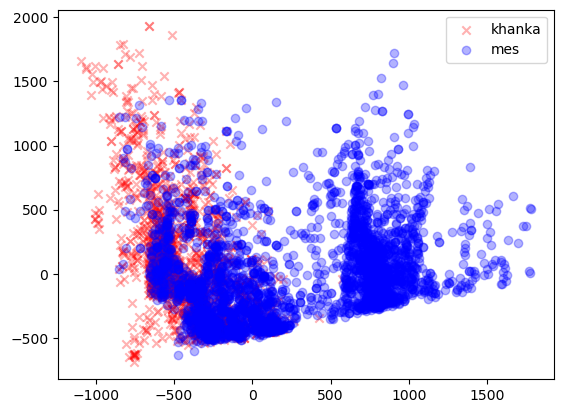

Explained coef ratio (PCA) for khanka_mes: [0.61158237 0.30176333]

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.10372609823949985
wc2.1_30s_bio_16 = 0.09392857334546353
wc2.1_30s_bio_13 = 0.07768341813438547
wc2.1_30s_bio_18 = 0.07352332202472654
wc2.1_30s_bio_1 = 0.05949840888608198
wc2.1_30s_bio_7 = 0.058824065519909895
wc2.1_30s_bio_11 = 0.05575680307640042
wc2.1_30s_bio_4 = 0.04911701217762993
wc2.1_30s_elev = 0.04677439162618413
wc2.1_30s_bio_15 = 0.040001644954193664
wc2.1_30s_bio_8 = 0.03951303257686392
wc2.1_30s_bio_10 = 0.039324096878031546
wc2.1_30s_bio_6 = 0.037384693264093334
wc2.1_30s_bio_3 = 0.03665480262764745
wc2.1_30s_bio_2 = 0.036487528751007484
wc2.1_30s_bio_9 = 0.03494993830259008
wc2.1_30s_bio_17 = 0.03230609068323441
wc2.1_30s_bio_5 = 0.03030388880030273
wc2.1_30s_bio_19 = 0.029264653461630166
wc2.1_30s_bio_14 = 0.024977536670123604


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_12: 0.15289558792565147
wc2.1_30s_bio_16: 0.10303677123152745
wc2.1_30s_bio_18: 0.08451288232131884
wc2.1_30s_bio_1: 0.07259786170637035
wc2.1_30s_bio_13: 0.07115195912968404
wc2.1_30s_bio_4: 0.06845536826865876
wc2.1_30s_bio_11: 0.06543191866677175
wc2.1_30s_bio_7: 0.0625378694322803
wc2.1_30s_elev: 0.05905132356526247
wc2.1_30s_bio_15: 0.05868930584391537
wc2.1_30s_bio_10: 0.0544152710763393
wc2.1_30s_bio_9: 0.050269982272384724
wc2.1_30s_bio_3: 0.04936688750572319
wc2.1_30s_bio_8: 0.04758701105411209


Balanced accuracy estimation for the best feature subset:

[0.77221531 0.76845791 0.79021096 0.75371229 0.76993886]


Balanced accuracy estimation for all features in the experiment:

[0.77661876 0.76847924 0.78313819 0.75482094 0.78611503]


Datasets to compare: khanka, steppe

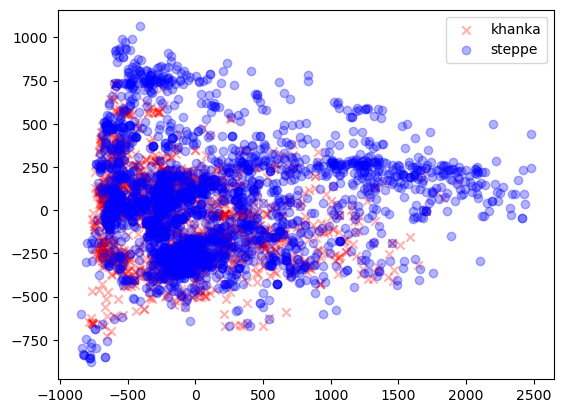

Explained coef ratio (PCA) for khanka_steppe: [0.76905528 0.17665082]

Feature importances of all considered features:

wc2.1_30s_bio_3 = 0.07867400929097323
wc2.1_30s_bio_18 = 0.07298784862517238
wc2.1_30s_bio_4 = 0.07132814498060112
wc2.1_30s_bio_9 = 0.06077795886053678
wc2.1_30s_bio_16 = 0.05811809453906653
wc2.1_30s_elev = 0.05594423983076325
wc2.1_30s_bio_15 = 0.0537253542440344
wc2.1_30s_bio_11 = 0.05195522447103557
wc2.1_30s_bio_12 = 0.05055814551614927
wc2.1_30s_bio_1 = 0.04981751649626525
wc2.1_30s_bio_2 = 0.047586321813597676
wc2.1_30s_bio_13 = 0.047007354625615595
wc2.1_30s_bio_10 = 0.04531480568887871
wc2.1_30s_bio_8 = 0.043836504545054535
wc2.1_30s_bio_5 = 0.042046806474673785
wc2.1_30s_bio_7 = 0.04149393171683075
wc2.1_30s_bio_6 = 0.039729794025780696
wc2.1_30s_bio_19 = 0.03453804666869044
wc2.1_30s_bio_17 = 0.03370016644973087
wc2.1_30s_bio_14 = 0.02085973113654929


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_18: 0.07732486772933095
wc2.1_30s_bio_3: 0.07563551057110654
wc2.1_30s_bio_4: 0.07213827595391159
wc2.1_30s_bio_9: 0.06053220580558091
wc2.1_30s_bio_15: 0.05887058499191147
wc2.1_30s_bio_11: 0.05763038083202954
wc2.1_30s_elev: 0.057554034345593544
wc2.1_30s_bio_16: 0.05753394495891731
wc2.1_30s_bio_12: 0.0544594925477529
wc2.1_30s_bio_1: 0.04946037201126047
wc2.1_30s_bio_2: 0.04695427820797787
wc2.1_30s_bio_10: 0.04550473249694798
wc2.1_30s_bio_8: 0.04389336061797919
wc2.1_30s_bio_13: 0.04378019780493858
wc2.1_30s_bio_7: 0.04316796057941575
wc2.1_30s_bio_6: 0.04176983216365935
wc2.1_30s_bio_5: 0.0407365946864226
wc2.1_30s_bio_17: 0.037935227922949774
wc2.1_30s_bio_19: 0.03511814577231358


Balanced accuracy estimation for the best feature subset:

[0.68177171 0.66792281 0.68509084 0.66402244 0.67844101]


Balanced accuracy estimation for all features in the experiment:

[0.68249963 0.66292346 0.68915247 0.65441143 0.68213582]


Datasets to compare: khanka, khanka_only

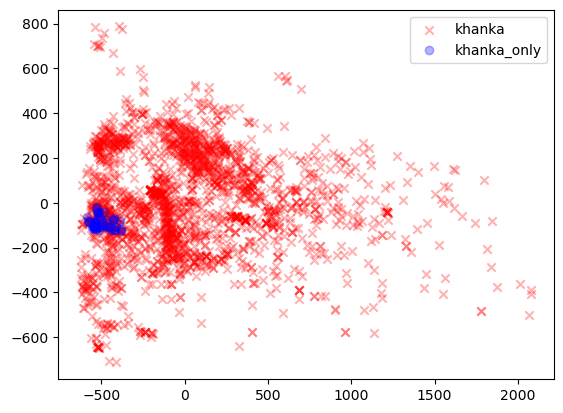

Explained coef ratio (PCA) for khanka_khanka_only: [0.73929052 0.18715284]

Feature importances of all considered features:

wc2.1_30s_bio_10 = 0.07282014268145641
wc2.1_30s_bio_15 = 0.06549065452863341
wc2.1_30s_bio_12 = 0.06404485089711218
wc2.1_30s_bio_13 = 0.060459905864075104
wc2.1_30s_bio_1 = 0.06014450083257993
wc2.1_30s_bio_4 = 0.05766337469827734
wc2.1_30s_bio_16 = 0.05384508381676209
wc2.1_30s_elev = 0.05282738300910619
wc2.1_30s_bio_9 = 0.05173288846759718
wc2.1_30s_bio_6 = 0.051382786667196055
wc2.1_30s_bio_3 = 0.05114890913629664
wc2.1_30s_bio_5 = 0.048720509982546095
wc2.1_30s_bio_18 = 0.04828677785254867
wc2.1_30s_bio_8 = 0.0466813975607428
wc2.1_30s_bio_11 = 0.04077397912516874
wc2.1_30s_bio_7 = 0.03868741300311929
wc2.1_30s_bio_17 = 0.03763873437321958
wc2.1_30s_bio_19 = 0.0332536338203135
wc2.1_30s_bio_2 = 0.03260227824679949
wc2.1_30s_bio_14 = 0.031794795436449336


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_10: 0.08869919498757912
wc2.1_30s_bio_13: 0.07272263926167359
wc2.1_30s_bio_15: 0.07092839188518307
wc2.1_30s_bio_12: 0.06575000797015586
wc2.1_30s_bio_16: 0.05657331425366391
wc2.1_30s_bio_11: 0.05467481633316902
wc2.1_30s_bio_5: 0.05233442786413776
wc2.1_30s_bio_9: 0.05088535578325884
wc2.1_30s_bio_18: 0.05040996885978347
wc2.1_30s_bio_8: 0.04994661510422591
wc2.1_30s_bio_17: 0.048286319435423775
wc2.1_30s_bio_1: 0.04820962022683241
wc2.1_30s_bio_3: 0.047043478280900004
wc2.1_30s_bio_7: 0.04644939512342849
wc2.1_30s_bio_4: 0.04610797190385158
wc2.1_30s_bio_6: 0.04052361260830721
wc2.1_30s_bio_19: 0.03946349512538307
wc2.1_30s_elev: 0.03880074734796679
wc2.1_30s_bio_2: 0.03219062764507619


Balanced accuracy estimation for the best feature subset:

[0.74557522 0.64557522 0.67184035 0.72616408 0.5886918 ]


Balanced accuracy estimation for all features in the experiment:

[0.79557522 0.59557522 0.67184035 0.77161863 0.67960089]


Datasets to compare: mes, steppe

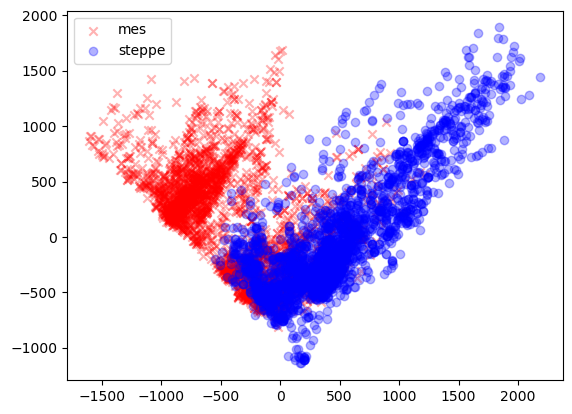

Explained coef ratio (PCA) for mes_steppe: [0.55117524 0.35951625]

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.15654800813794353
wc2.1_30s_bio_13 = 0.12013537804908321
wc2.1_30s_bio_16 = 0.11206666025349182
wc2.1_30s_bio_12 = 0.09397333983823984
wc2.1_30s_elev = 0.056476711597382184
wc2.1_30s_bio_8 = 0.052416834205615874
wc2.1_30s_bio_10 = 0.0500271354521424
wc2.1_30s_bio_3 = 0.041125630701302214
wc2.1_30s_bio_2 = 0.03770345556996779
wc2.1_30s_bio_15 = 0.03632532410427433
wc2.1_30s_bio_1 = 0.035896932552834375
wc2.1_30s_bio_9 = 0.028339159496012924
wc2.1_30s_bio_11 = 0.027119663549345852
wc2.1_30s_bio_4 = 0.024530786803404557
wc2.1_30s_bio_7 = 0.023824385531181463
wc2.1_30s_bio_6 = 0.02266738421334938
wc2.1_30s_bio_19 = 0.021521505186736022
wc2.1_30s_bio_17 = 0.02067385004504748
wc2.1_30s_bio_5 = 0.02032472871647063
wc2.1_30s_bio_14 = 0.0183031259961741


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_18: 0.17856388992844363
wc2.1_30s_bio_16: 0.14627768155249382
wc2.1_30s_bio_13: 0.11228013290542009
wc2.1_30s_bio_12: 0.0929349762683243
wc2.1_30s_bio_8: 0.05621377325381271
wc2.1_30s_elev: 0.05572952395716908
wc2.1_30s_bio_10: 0.04420323119217851
wc2.1_30s_bio_3: 0.04288589901463216
wc2.1_30s_bio_2: 0.04213538598429227
wc2.1_30s_bio_1: 0.03904005553653528
wc2.1_30s_bio_15: 0.038178127038151974
wc2.1_30s_bio_17: 0.03246926447218139
wc2.1_30s_bio_4: 0.03183802980648687
wc2.1_30s_bio_9: 0.031517585963367
wc2.1_30s_bio_6: 0.027932402091304622
wc2.1_30s_bio_11: 0.027800041035206408


Balanced accuracy estimation for the best feature subset:

[0.86717373 0.85579709 0.87100207 0.86340849 0.8777249 ]


Balanced accuracy estimation for all features in the experiment:

[0.86994638 0.85692117 0.87263281 0.86846494 0.87683634]


Datasets to compare: mes, khanka_only

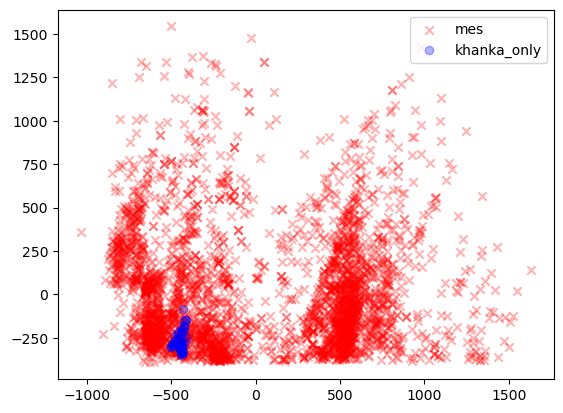

Explained coef ratio (PCA) for mes_khanka_only: [0.68064846 0.22490804]

Feature importances of all considered features:

wc2.1_30s_bio_15 = 0.09066711066756449
wc2.1_30s_bio_11 = 0.08464730699968079
wc2.1_30s_bio_1 = 0.06844319110135431
wc2.1_30s_bio_9 = 0.062111811846426265
wc2.1_30s_bio_13 = 0.05736950944810887
wc2.1_30s_bio_10 = 0.053994131647069475
wc2.1_30s_bio_19 = 0.0532095881758228
wc2.1_30s_bio_17 = 0.052913172142305294
wc2.1_30s_bio_4 = 0.05184089061169076
wc2.1_30s_bio_18 = 0.05117547717303367
wc2.1_30s_bio_16 = 0.047205684524305055
wc2.1_30s_bio_12 = 0.04552616777310337
wc2.1_30s_bio_3 = 0.044430881205491275
wc2.1_30s_bio_7 = 0.04169784485805139
wc2.1_30s_bio_8 = 0.04090020163945066
wc2.1_30s_elev = 0.04059903692151785
wc2.1_30s_bio_6 = 0.032876584300386646
wc2.1_30s_bio_2 = 0.03252837928184078
wc2.1_30s_bio_5 = 0.024656592254633493
wc2.1_30s_bio_14 = 0.023206437428162707


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_15: 0.11140102592391463
wc2.1_30s_bio_11: 0.07996060886091419
wc2.1_30s_bio_1: 0.07606587216395756
wc2.1_30s_bio_4: 0.07333342837543946
wc2.1_30s_bio_9: 0.07133594878193242
wc2.1_30s_bio_6: 0.06259045034546172
wc2.1_30s_bio_10: 0.05796291319420023
wc2.1_30s_bio_17: 0.05623535618303358
wc2.1_30s_bio_16: 0.056202689020378595
wc2.1_30s_bio_12: 0.05525306093032365
wc2.1_30s_bio_19: 0.05403729455997389
wc2.1_30s_bio_13: 0.051752621585485166
wc2.1_30s_elev: 0.046010620883331216
wc2.1_30s_bio_2: 0.04029325813560068
wc2.1_30s_bio_8: 0.039227562382707845
wc2.1_30s_bio_18: 0.03784806265933639
wc2.1_30s_bio_5: 0.03048922601400888


Balanced accuracy estimation for the best feature subset:

[0.79656121 0.86225895 0.86294766 0.72520661 0.84586777]


Balanced accuracy estimation for all features in the experiment:

[0.79724897 0.77134986 0.86225895 0.67975207 0.84586777]


Datasets to compare: steppe, khanka_only

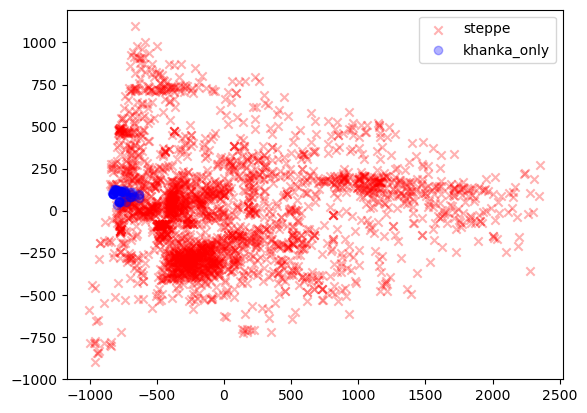

Explained coef ratio (PCA) for steppe_khanka_only: [0.79833746 0.15817009]

Feature importances of all considered features:

wc2.1_30s_elev = 0.12446233098758837
wc2.1_30s_bio_15 = 0.10575071105200294
wc2.1_30s_bio_18 = 0.10351358538941037
wc2.1_30s_bio_13 = 0.09132906557610411
wc2.1_30s_bio_16 = 0.0710166193820256
wc2.1_30s_bio_5 = 0.06730992850756991
wc2.1_30s_bio_4 = 0.062371409526390365
wc2.1_30s_bio_12 = 0.052867389081822494
wc2.1_30s_bio_7 = 0.04223639614366696
wc2.1_30s_bio_8 = 0.04077758884296887
wc2.1_30s_bio_9 = 0.036052422694275596
wc2.1_30s_bio_6 = 0.03585061381944679
wc2.1_30s_bio_17 = 0.03205926355248649
wc2.1_30s_bio_19 = 0.02998497686199196
wc2.1_30s_bio_11 = 0.02371144071218739
wc2.1_30s_bio_10 = 0.022829414596526886
wc2.1_30s_bio_3 = 0.021387561640490015
wc2.1_30s_bio_14 = 0.020204168403562345
wc2.1_30s_bio_1 = 0.013686573855798623
wc2.1_30s_bio_2 = 0.002598539373683851


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_elev: 0.25840868886457014
wc2.1_30s_bio_13: 0.24547530893528718
wc2.1_30s_bio_18: 0.18093145906603703
wc2.1_30s_bio_15: 0.16939418317336108
wc2.1_30s_bio_16: 0.14579035996074463


Balanced accuracy estimation for the best feature subset:

[1.         1.         0.95454545 1.         1.        ]


Balanced accuracy estimation for all features in the experiment:

[1.         1.         0.90909091 1.         0.95      ]


END OF COMPUTATIONS

All datasets. Feature set name: all_features

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only']

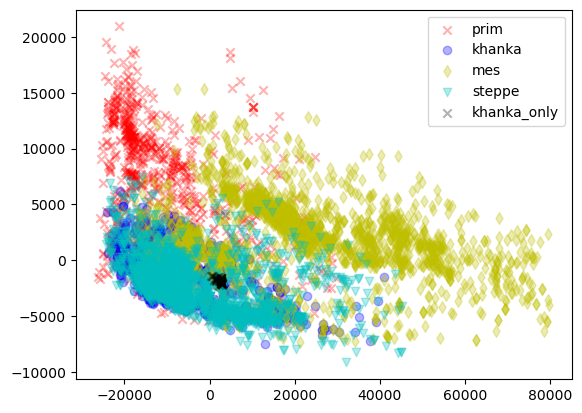

Explained coef ratio (PCA) for prim_khanka_mes_steppe_khanka_only: [0.94561199 0.03913858]

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.050727899083170935
wc2.1_30s_bio_12 = 0.04214048368169932
current_30arcsec_minTempWarmest = 0.038746797780176534
wc2.1_30s_bio_16 = 0.03753489208024369
ai_v3_yr = 0.03457823451863673
wc2.1_30s_bio_13 = 0.03362476424724705
current_30arcsec_embergerQ = 0.03242911570775857
wc2.1_30s_bio_8 = 0.031429049453941656
current_30arcsec_aridityIndexThornthwaite = 0.030836423570018513
current_30arcsec_continentality = 0.02909310600414753
wc2.1_30s_bio_4 = 0.02787376227759579
wc2.1_30s_bio_7 = 0.02433243081853521
current_30arcsec_climaticMoistureIndex = 0.021549487610704954
wc2.1_30s_bio_15 = 0.02113287270289826
wc2.1_30s_bio_1 = 0.021023361192256357
wc2.1_30s_bio_19 = 0.02059938264268088
wc2.1_30s_bio_10 = 0.02001881363328608
et0_v3_yr = 0.019781159762445034
wc2.1_30s_bio_3 = 0.01973873531209129
current_30arcsec_PETseasonality = 0.019375096252132133
current_30arcsec_PETDriestQuarter = 0.01928714079115424
wc2.1_30s_bio_9 = 0.018515689565848144
current_30arcsec_tri = 0.0184208035

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_bio_18: 0.0628574122248393
current_30arcsec_embergerQ: 0.057243657829295316
wc2.1_30s_bio_16: 0.05382999066724956
wc2.1_30s_bio_13: 0.05363524373983254
current_30arcsec_minTempWarmest: 0.053256322624533274
wc2.1_30s_bio_12: 0.05026148409271837
wc2.1_30s_bio_8: 0.05024499806160421
ai_v3_yr: 0.04783116032036932
wc2.1_30s_bio_10: 0.04253951214081985
current_30arcsec_continentality: 0.03982670757066391
current_30arcsec_aridityIndexThornthwaite: 0.039741077857174775
current_30arcsec_PETseasonality: 0.0390472566988656
wc2.1_30s_bio_15: 0.038473629891982324
wc2.1_30s_bio_4: 0.03800537142378703
wc2.1_30s_bio_3: 0.03608259875525461
current_30arcsec_annualPET: 0.035658477323594936
wc2.1_30s_elev: 0.03515358746278487
wc2.1_30s_bio_1: 0.03388189800835268
current_30arcsec_climaticMoistureIndex: 0.033728759155618314
wc2.1_30s_bio_9: 0.03366081707967791
wc2.1_30s_bio_7: 0.032755432882990085
current_30arcsec_tri: 0.03083664263063192
FOR_2000: 0.030750427085022583
et0_v3_yr: 0.030697534472336

Balanced accuracy estimation for the best feature subset:

[0.51925571 0.55483849 0.53145085 0.56720237 0.51569051]


Balanced accuracy estimation for all features in the experiment:

[0.53416315 0.55563806 0.51141538 0.55004572 0.51438052]


Pair analysis. Feature set name: all_features

Datasets to compare: prim, khanka

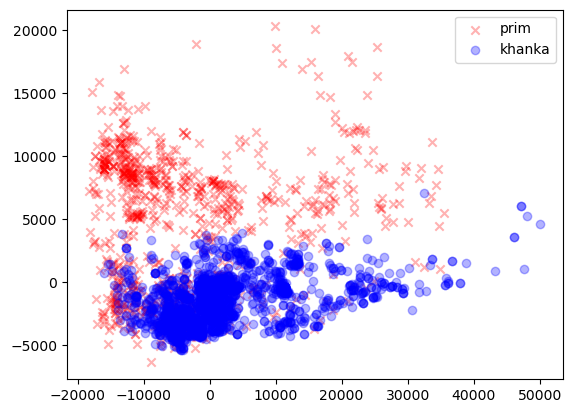

Explained coef ratio (PCA) for prim_khanka: [0.81591507 0.15459527]

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.0893448332313279
wc2.1_30s_bio_4 = 0.07972912037573421
current_30arcsec_continentality = 0.07432821514471548
current_30arcsec_embergerQ = 0.060880646750586694
wc2.1_30s_bio_19 = 0.048203169433341554
wc2.1_30s_bio_14 = 0.036294023938176566
wc2.1_30s_bio_17 = 0.033058042125903
current_30arcsec_PETseasonality = 0.033024448924473974
current_30arcsec_climaticMoistureIndex = 0.032135989117350605
ai_v3_yr = 0.03136304880172673
wc2.1_30s_bio_15 = 0.02745507488658909
current_30arcsec_annualPET = 0.020567180230000322
wc2.1_30s_bio_10 = 0.01953585158069795
wc2.1_30s_bio_7 = 0.019413508191429903
current_30arcsec_tri = 0.01889442402344622
et0_v3_yr = 0.017336377794007044
current_30arcsec_PETWettestQuarter = 0.01683137141571013
current_30arcsec_thermicityIndex = 0.016027294841875386
current_30arcsec_growingDegDays5 = 0.015996535956683513
wc2.1_30s_bio_3 = 0.015719998150530334
wc2.1_30s_bio_2 = 0.01477098260630665
wc2.1_30s_bio_12 = 0.013860537704194494
wc2.1_30s_bio_9 = 0.0138282

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_bio_8: 0.10501548031415806
current_30arcsec_embergerQ: 0.09347559098003635
current_30arcsec_continentality: 0.08463332477858365
wc2.1_30s_bio_19: 0.07769721089331492
wc2.1_30s_bio_4: 0.0678168239898696
wc2.1_30s_bio_14: 0.06193924949551147
wc2.1_30s_bio_7: 0.0550614826298625
wc2.1_30s_bio_17: 0.03762856686372513
wc2.1_30s_bio_12: 0.03744449241593669
wc2.1_30s_bio_15: 0.03628250633141668
current_30arcsec_PETWettestQuarter: 0.0358084996760946
current_30arcsec_annualPET: 0.03234724217611063
et0_v3_yr: 0.0314831905608283
current_30arcsec_thermicityIndex: 0.0310607497503688
wc2.1_30s_bio_10: 0.030820075493396562
current_30arcsec_tri: 0.02973487147930287
current_30arcsec_growingDegDays5: 0.028579342067673735
current_30arcsec_growingDegDays0: 0.025079275139465982
wc2.1_30s_bio_3: 0.024806139086529858
current_30arcsec_PETseasonality: 0.024795718404728065
wc2.1_30s_elev: 0.02458705882351579
current_30arcsec_topoWet: 0.023903108649569887


Balanced accuracy estimation for the best feature subset:

[0.81129875 0.78282069 0.8241454  0.80678466 0.86087231]


Balanced accuracy estimation for all features in the experiment:

[0.79818938 0.78488561 0.81844979 0.80474083 0.85517278]


Datasets to compare: prim, mes

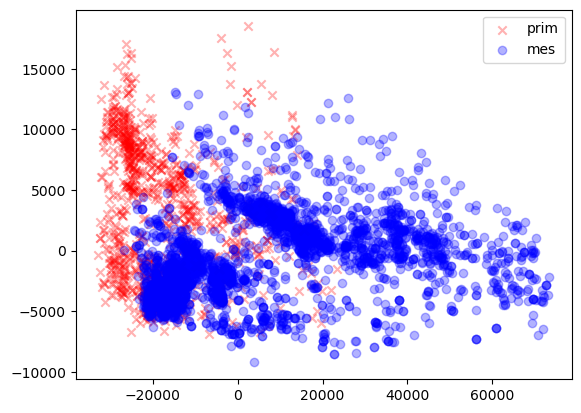

Explained coef ratio (PCA) for prim_mes: [0.95501455 0.03206121]

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.10697476501508114
current_30arcsec_minTempWarmest = 0.09741775619071909
wc2.1_30s_bio_10 = 0.07776939853598629
wc2.1_30s_bio_5 = 0.06074715058649289
current_30arcsec_continentality = 0.0542272109154841
current_30arcsec_PETWettestQuarter = 0.05407711311698137
wc2.1_30s_bio_4 = 0.053789958203118396
current_30arcsec_growingDegDays5 = 0.03480281917070972
wc2.1_30s_elev = 0.02043555448366682
sq1 = 0.01981596129900501
current_30arcsec_PETDriestQuarter = 0.019181120800323106
sq7 = 0.01906146896403124
wc2.1_30s_bio_19 = 0.01898912920258607
current_30arcsec_PETWarmestQuarter = 0.01681902653645281
wc2.1_30s_bio_15 = 0.016548594732877096
sq5 = 0.015406861940370071
wc2.1_30s_bio_16 = 0.014729010787906952
wc2.1_30s_bio_3 = 0.014411145987634032
wc2.1_30s_bio_9 = 0.014331832001592684
sq6 = 0.01386006256588404
sq4 = 0.011329531386894786
current_30arcsec_monthCountByTemp10 = 0.011095777774552087
current_30arcsec_tri = 0.010728136736921324
sq3 = 0.010703259568305016
sq2 = 0.010489329

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

current_30arcsec_minTempWarmest: 0.11667972043842922
wc2.1_30s_bio_10: 0.08876912107874568
wc2.1_30s_bio_8: 0.06515245522835159
current_30arcsec_continentality: 0.05551248607511271
wc2.1_30s_bio_4: 0.05228341551269729
wc2.1_30s_bio_5: 0.050170803425404226
current_30arcsec_PETWettestQuarter: 0.035034482545298784
wc2.1_30s_elev: 0.03448532152529027
current_30arcsec_growingDegDays5: 0.034236059929165355
wc2.1_30s_bio_15: 0.032708343080507137
current_30arcsec_PETDriestQuarter: 0.029835178022068115
wc2.1_30s_bio_19: 0.027588073201307056
current_30arcsec_annualPET: 0.024758385111413848
sq7: 0.02344572882360187
sq3: 0.01723656674412883
sq2: 0.016716493602201923
wc2.1_30s_bio_9: 0.015536281193614632
wc2.1_30s_bio_7: 0.015394854228578598
sq4: 0.013029483572848756
wc2.1_30s_bio_18: 0.012920572518808428
sq1: 0.01237614877001278
current_30arcsec_thermicityIndex: 0.012254876674027684
et0_v3_yr: 0.011913158558397172
wc2.1_30s_bio_16: 0.0117825126630573
current_30arcsec_growingDegDays0: 0.01166995015

Balanced accuracy estimation for the best feature subset:

[0.9091007  0.89893332 0.88510047 0.89925984 0.86078316]


Balanced accuracy estimation for all features in the experiment:

[0.908412   0.9091007  0.8834195  0.88904827 0.8577135 ]


Datasets to compare: prim, steppe

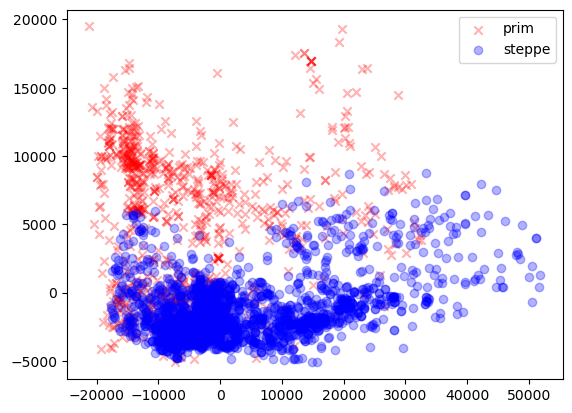

Explained coef ratio (PCA) for prim_steppe: [0.8725284 0.10628482]

Feature importances of all considered features:

current_30arcsec_embergerQ = 0.07941103174714186
wc2.1_30s_bio_12 = 0.06425070715606412
ai_v3_yr = 0.06349214358332689
current_30arcsec_PETseasonality = 0.05474756174356036
wc2.1_30s_bio_17 = 0.042266111416323165
current_30arcsec_climaticMoistureIndex = 0.03857752627277726
current_30arcsec_continentality = 0.032340431628432795
current_30arcsec_PETWarmestQuarter = 0.03225531121870744
wc2.1_30s_bio_7 = 0.02954635469154268
wc2.1_30s_bio_19 = 0.028538506443545074
wc2.1_30s_bio_4 = 0.027635782629864155
current_30arcsec_annualPET = 0.025924124638155802
current_30arcsec_aridityIndexThornthwaite = 0.02566315831336139
current_30arcsec_PETWettestQuarter = 0.02085674491233957
wc2.1_30s_bio_10 = 0.020813118626694927
wc2.1_30s_bio_14 = 0.020662227796716066
wc2.1_30s_bio_16 = 0.01915182891070635
et0_v3_yr = 0.018682060001368756
current_30arcsec_topoWet = 0.015774141887560853
current_30arcsec_tri = 0.015733565093458485
wc2.1_30s_bio_8 = 0.01572783538817887
wc2.1_30s_bio_1 = 0.014997606075235483
wc2.1

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

current_30arcsec_embergerQ: 0.07617516566641526
current_30arcsec_climaticMoistureIndex: 0.0586625305868264
current_30arcsec_PETseasonality: 0.05742886518198908
current_30arcsec_PETWarmestQuarter: 0.050274190424372825
ai_v3_yr: 0.04901813728537316
wc2.1_30s_bio_17: 0.04705095390232375
current_30arcsec_aridityIndexThornthwaite: 0.0460259421712602
wc2.1_30s_bio_12: 0.038085897802979496
wc2.1_30s_bio_19: 0.03532318749861622
current_30arcsec_continentality: 0.0335922016442361
wc2.1_30s_bio_7: 0.024038209705362343
current_30arcsec_PETWettestQuarter: 0.022186035337837078
wc2.1_30s_bio_14: 0.021765878631286265
wc2.1_30s_bio_5: 0.02157976785506653
wc2.1_30s_bio_4: 0.021551115791920816
et0_v3_yr: 0.021419231930480023
current_30arcsec_topoWet: 0.020097045905592647
current_30arcsec_annualPET: 0.019357246372459135
wc2.1_30s_bio_10: 0.016470541381825902
current_30arcsec_tri: 0.014919591642977056
wc2.1_30s_bio_1: 0.014731827780368556
wc2.1_30s_bio_2: 0.014714064956775847
wc2.1_30s_bio_16: 0.014479773

Balanced accuracy estimation for the best feature subset:

[0.80587555 0.79443018 0.79206052 0.78854854 0.78826688]


Balanced accuracy estimation for all features in the experiment:

[0.80876646 0.79165754 0.79443018 0.79039697 0.79064783]


Datasets to compare: prim, khanka_only

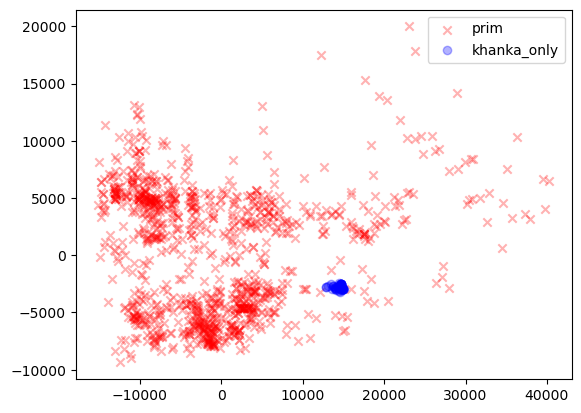

Explained coef ratio (PCA) for prim_khanka_only: [0.76835243 0.20550077]

Feature importances of all considered features:

current_30arcsec_minTempWarmest = 0.16816480384494306
wc2.1_30s_bio_10 = 0.08717532985613623
wc2.1_30s_elev = 0.07287818125723741
wc2.1_30s_bio_8 = 0.06919030458627116
current_30arcsec_thermicityIndex = 0.04836633817760287
wc2.1_30s_bio_6 = 0.040940348867893224
current_30arcsec_growingDegDays0 = 0.04089792855892421
wc2.1_30s_bio_5 = 0.039932348027296394
current_30arcsec_annualPET = 0.03879346306076176
current_30arcsec_growingDegDays5 = 0.031164452065144663
wc2.1_30s_bio_9 = 0.02665985423324102
wc2.1_30s_bio_7 = 0.024288683621677475
current_30arcsec_continentality = 0.024168528661852307
et0_v3_yr = 0.023077377046687563
wc2.1_30s_bio_11 = 0.020945148657060132
wc2.1_30s_bio_4 = 0.019574351190922493
current_30arcsec_PETDriestQuarter = 0.01870480570024613
wc2.1_30s_bio_3 = 0.015566842576879769
wc2.1_30s_bio_15 = 0.014939813355389882
current_30arcsec_monthCountByTemp10 = 0.01459538537032122
current_30arcsec_topoWet = 0.014548927959424498
wc2.1_30s_bio_18 = 0.013941367298392855
wc2.1_30s_bio_

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_bio_10: 0.14798302364569443
wc2.1_30s_bio_8: 0.1453517083993326
current_30arcsec_minTempWarmest: 0.11421905858716531
wc2.1_30s_elev: 0.08562911986379763
current_30arcsec_growingDegDays5: 0.07209942586377993
current_30arcsec_annualPET: 0.043353842624339584
wc2.1_30s_bio_5: 0.0404246062923401
wc2.1_30s_bio_11: 0.04024036971334466
current_30arcsec_thermicityIndex: 0.03209128766257174
wc2.1_30s_bio_15: 0.03130463783234234
wc2.1_30s_bio_9: 0.030795150467644757
wc2.1_30s_bio_4: 0.0268493810904788
wc2.1_30s_bio_18: 0.022974917382216506
current_30arcsec_growingDegDays0: 0.021237833327805086
wc2.1_30s_bio_12: 0.020027663203759656
wc2.1_30s_bio_6: 0.01989872643005505
current_30arcsec_PETDriestQuarter: 0.019681824352662334
wc2.1_30s_bio_3: 0.014081220022495818
current_30arcsec_continentality: 0.013792888406072538
ai_v3_yr: 0.0131667662630162
current_30arcsec_topoWet: 0.01179556246929285
wc2.1_30s_bio_2: 0.00969310208268537
wc2.1_30s_bio_7: 0.008106521524307997
current_30arcsec_maxTempCo

Balanced accuracy estimation for the best feature subset:

[1.         0.99763033 0.89763033 1.         1.        ]


Balanced accuracy estimation for all features in the experiment:

[1.         1.         0.89763033 1.         1.        ]


Datasets to compare: khanka, mes

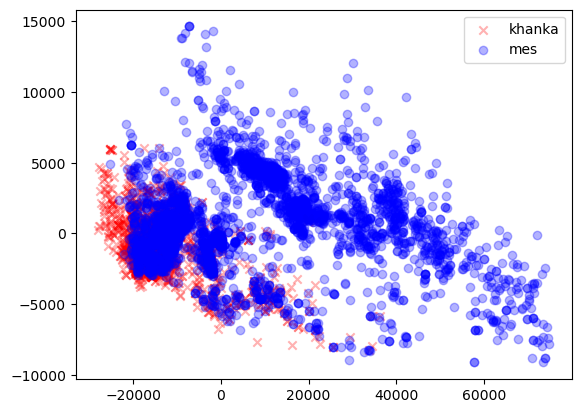

Explained coef ratio (PCA) for khanka_mes: [0.96821825 0.01906286]

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.07992642003813141
wc2.1_30s_bio_16 = 0.053525379219057846
ai_v3_yr = 0.041470281728242
wc2.1_30s_bio_18 = 0.04105394526961979
current_30arcsec_embergerQ = 0.037535967400515784
current_30arcsec_growingDegDays0 = 0.0338326945874973
wc2.1_30s_bio_13 = 0.03096350708286649
wc2.1_30s_bio_11 = 0.02820964005273956
wc2.1_30s_bio_6 = 0.023730919286724737
current_30arcsec_maxTempColdest = 0.02223537826299018
current_30arcsec_PETColdestQuarter = 0.02178515273789802
wc2.1_30s_bio_1 = 0.021139525115871135
current_30arcsec_aridityIndexThornthwaite = 0.020884101090405848
wc2.1_30s_bio_7 = 0.020204288145572756
wc2.1_30s_elev = 0.01878325941712507
wc2.1_30s_bio_9 = 0.018104357566194686
current_30arcsec_tri = 0.017670340964295556
current_30arcsec_continentality = 0.01723944391924248
GRS_2000 = 0.016962984095486675
CULTRF_2000 = 0.016847255640033178
URB_2000 = 0.01662567853651256
wc2.1_30s_bio_2 = 0.016443598621332406
FOR_2000 = 0.016336531032866208
current_30arcsec_climaticMoistureIn

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

current_30arcsec_embergerQ: 0.07053833484805229
wc2.1_30s_bio_12: 0.05996497088619837
wc2.1_30s_bio_16: 0.04646343672397535
ai_v3_yr: 0.03984811583152773
wc2.1_30s_bio_1: 0.03732936462871458
wc2.1_30s_bio_13: 0.03515618136644475
wc2.1_30s_bio_7: 0.03291118027283498
wc2.1_30s_bio_18: 0.0302420011639817
current_30arcsec_growingDegDays0: 0.030172328736464096
wc2.1_30s_bio_11: 0.026389019543953344
current_30arcsec_continentality: 0.026318242827905788
current_30arcsec_PETColdestQuarter: 0.02594525730478993
current_30arcsec_aridityIndexThornthwaite: 0.02221371744114882
current_30arcsec_climaticMoistureIndex: 0.02116421790135952
wc2.1_30s_bio_4: 0.018858646348321708
current_30arcsec_tri: 0.018217758482895606
CULTRF_2000: 0.017995861824342544
wc2.1_30s_elev: 0.01765355375273766
NVG_2000: 0.017393066547845365
GRS_2000: 0.017082574517944413
sq7: 0.01654497977218796
URB_2000: 0.016470114824700923
FOR_2000: 0.016378449977651956
current_30arcsec_minTempWarmest: 0.016227136777020205
wc2.1_30s_bio_2:

Balanced accuracy estimation for the best feature subset:

[0.78642824 0.75587228 0.78141346 0.77234093 0.78503998]


Balanced accuracy estimation for all features in the experiment:

[0.78379836 0.75338867 0.77755378 0.7572734  0.78362897]


Datasets to compare: khanka, steppe

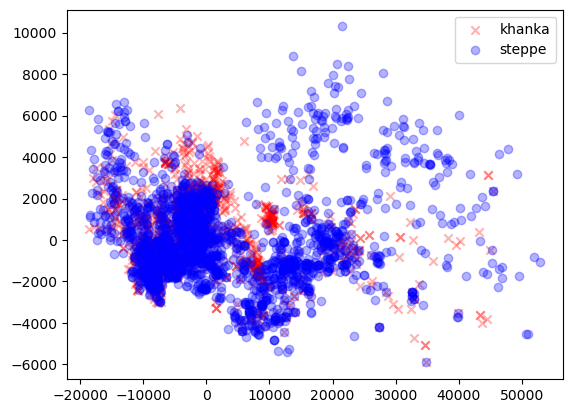

Explained coef ratio (PCA) for khanka_steppe: [0.94424726 0.02908569]

Feature importances of all considered features:

wc2.1_30s_bio_3 = 0.04484833959670963
ai_v3_yr = 0.036393019543758315
current_30arcsec_aridityIndexThornthwaite = 0.03630148364389808
wc2.1_30s_bio_18 = 0.03569997545450418
current_30arcsec_continentality = 0.03370017809505982
wc2.1_30s_bio_16 = 0.028064197750332934
wc2.1_30s_bio_4 = 0.02778776531555012
wc2.1_30s_bio_13 = 0.027208102378653405
wc2.1_30s_bio_15 = 0.027059618103594335
current_30arcsec_PETDriestQuarter = 0.02658378960255746
current_30arcsec_maxTempColdest = 0.025255195472362855
wc2.1_30s_bio_11 = 0.02361440487007338
current_30arcsec_tri = 0.022849135725125563
et0_v3_yr = 0.022777952271007602
wc2.1_30s_bio_9 = 0.02225083348619013
wc2.1_30s_bio_2 = 0.02152661464208987
current_30arcsec_embergerQ = 0.020975816368343815
wc2.1_30s_elev = 0.020942040882756332
current_30arcsec_annualPET = 0.020871968230739626
FOR_2000 = 0.020283213217147433
wc2.1_30s_bio_6 = 0.020279941220955635
wc2.1_30s_bio_8 = 0.020161545584810224
wc2.1_30s_bio_12 = 0.02014923154169308
current_30arcsec_PETWarme

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_bio_3: 0.04612823382321138
wc2.1_30s_bio_18: 0.04101393050101552
wc2.1_30s_bio_9: 0.03262094630726836
ai_v3_yr: 0.032528931610328764
current_30arcsec_PETDriestQuarter: 0.032478939558783004
current_30arcsec_continentality: 0.030824202176984575
wc2.1_30s_bio_4: 0.03060166665491218
current_30arcsec_aridityIndexThornthwaite: 0.029951380452211865
wc2.1_30s_bio_16: 0.02889038822363023
wc2.1_30s_bio_13: 0.028837170410645405
et0_v3_yr: 0.028172550551756874
wc2.1_30s_bio_15: 0.026734495926488848
current_30arcsec_tri: 0.023417188043214476
FOR_2000: 0.02282159995082842
current_30arcsec_maxTempColdest: 0.022622531934638798
wc2.1_30s_bio_12: 0.022453856439549173
wc2.1_30s_elev: 0.02221202205903589
GRS_2000: 0.02148243380143209
wc2.1_30s_bio_2: 0.021328025755901144
current_30arcsec_embergerQ: 0.02128797054141892
current_30arcsec_topoWet: 0.020234978624100567
wc2.1_30s_bio_8: 0.019865615600811168
current_30arcsec_annualPET: 0.01984145855772512
wc2.1_30s_bio_11: 0.01980328727452948
current_3

Balanced accuracy estimation for the best feature subset:

[0.68586116 0.71018313 0.69322024 0.66790373 0.68139399]


Balanced accuracy estimation for all features in the experiment:

[0.68917974 0.70613662 0.69469776 0.67732621 0.68009886]


Datasets to compare: khanka, khanka_only

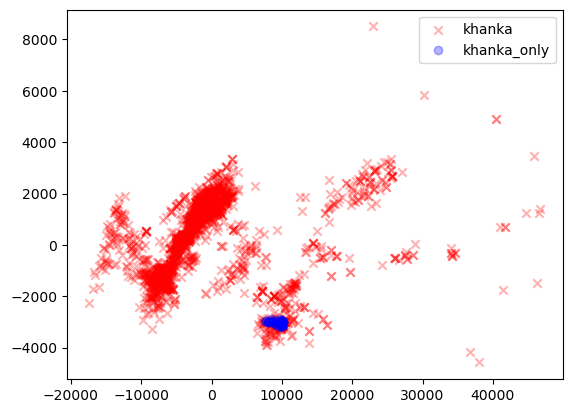

Explained coef ratio (PCA) for khanka_khanka_only: [0.93137934 0.0338215 ]

Feature importances of all considered features:

current_30arcsec_topoWet = 0.05083587042645701
current_30arcsec_annualPET = 0.03345105271453915
FOR_2000 = 0.03309516577280034
current_30arcsec_growingDegDays5 = 0.032645322651819374
wc2.1_30s_bio_10 = 0.03150281898284022
wc2.1_30s_bio_15 = 0.03146969416354015
wc2.1_30s_bio_1 = 0.030953827986798594
wc2.1_30s_bio_9 = 0.03087162516333296
wc2.1_30s_bio_4 = 0.02883784647431391
current_30arcsec_growingDegDays0 = 0.027930919565737664
current_30arcsec_PETColdestQuarter = 0.027169667533936223
wc2.1_30s_bio_11 = 0.02633610765932152
wc2.1_30s_bio_16 = 0.025369609733247183
ai_v3_yr = 0.025255219240303023
current_30arcsec_aridityIndexThornthwaite = 0.025178655253212247
wc2.1_30s_bio_7 = 0.02511280813617711
wc2.1_30s_bio_6 = 0.024874786590199423
et0_v3_yr = 0.02353762872746548
wc2.1_30s_elev = 0.022534940842502835
current_30arcsec_PETDriestQuarter = 0.022030163412325793
current_30arcsec_embergerQ = 0.021436309710676723
wc2.1_30s_bio_3 = 0.021405586902016004
wc2.1_30s_bio_12 = 0.021221041985487
wc2.

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

current_30arcsec_topoWet: 0.09728066411401047
ai_v3_yr: 0.08711509273259532
current_30arcsec_annualPET: 0.08216433318705713
wc2.1_30s_bio_9: 0.07325476167864205
wc2.1_30s_bio_3: 0.07307669465319093
wc2.1_30s_bio_1: 0.07267018818995875
current_30arcsec_growingDegDays5: 0.0714675376155153
current_30arcsec_PETDriestQuarter: 0.07089257777041506
wc2.1_30s_bio_15: 0.0701876301914421
FOR_2000: 0.06235507224906077
wc2.1_30s_bio_11: 0.06081366048589651
current_30arcsec_growingDegDays0: 0.060622506228695444
et0_v3_yr: 0.06027399648659712
wc2.1_30s_bio_10: 0.05782528441692313


Balanced accuracy estimation for the best feature subset:

[0.79557522 0.84668142 0.67849224 0.81596452 0.76829268]


Balanced accuracy estimation for all features in the experiment:

[0.74336283 0.69889381 0.67738359 0.72505543 0.81485588]


Datasets to compare: mes, steppe

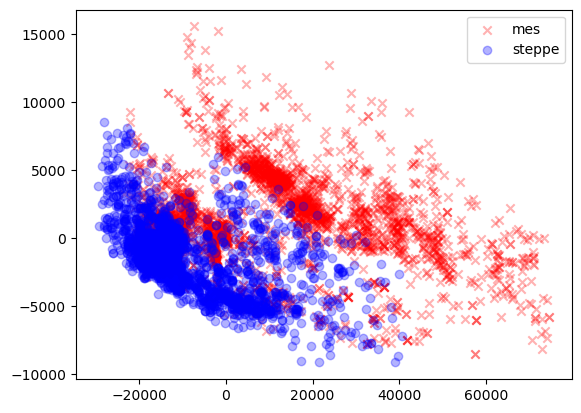

Explained coef ratio (PCA) for mes_steppe: [0.96294394 0.02229935]

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.09803826448862733
wc2.1_30s_bio_16 = 0.06147241573933946
current_30arcsec_aridityIndexThornthwaite = 0.056152522090784425
wc2.1_30s_bio_12 = 0.04978333768054
ai_v3_yr = 0.0489147582114792
wc2.1_30s_bio_13 = 0.04624534298983095
current_30arcsec_climaticMoistureIndex = 0.042665739176828144
current_30arcsec_minTempWarmest = 0.03889410679349262
current_30arcsec_embergerQ = 0.03277585824787278
wc2.1_30s_bio_8 = 0.029582499104019947
wc2.1_30s_elev = 0.023810703096067275
wc2.1_30s_bio_3 = 0.021579337314874283
NVG_2000 = 0.020036781201249732
current_30arcsec_PETseasonality = 0.01855314110601823
wc2.1_30s_bio_10 = 0.018291263852038622
current_30arcsec_PETColdestQuarter = 0.0163483550721001
current_30arcsec_growingDegDays5 = 0.016135610345736632
wc2.1_30s_bio_2 = 0.015544379134332504
CULTRF_2000 = 0.015276018856329596
FOR_2000 = 0.015230098552060044
wc2.1_30s_bio_4 = 0.014282235182124941
wc2.1_30s_bio_15 = 0.013947036545265573
current_30arcsec_growingDegDays0 = 0.01363680865

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_bio_18: 0.09816528258989013
wc2.1_30s_bio_16: 0.07902724863617974
wc2.1_30s_bio_13: 0.06615591853118763
wc2.1_30s_bio_12: 0.058366020967189236
ai_v3_yr: 0.04584011715044924
current_30arcsec_climaticMoistureIndex: 0.040976041576916235
current_30arcsec_minTempWarmest: 0.033611330599904544
current_30arcsec_aridityIndexThornthwaite: 0.032431516231564775
wc2.1_30s_bio_8: 0.030315894564093768
current_30arcsec_embergerQ: 0.028994768508644672
NVG_2000: 0.027620572685200098
wc2.1_30s_elev: 0.024882832739656663
wc2.1_30s_bio_10: 0.02003590974959445
wc2.1_30s_bio_3: 0.017467916732316343
CULTRF_2000: 0.016501012461683305
current_30arcsec_thermicityIndex: 0.015180904768380023
wc2.1_30s_bio_15: 0.014555127029436262
wc2.1_30s_bio_2: 0.01409943006777017
current_30arcsec_continentality: 0.01391284301865412
CULT_2000: 0.013651599651982196
current_30arcsec_PETseasonality: 0.01339409449145858
GRS_2000: 0.012628566854729717
current_30arcsec_tri: 0.012591432078115854
current_30arcsec_PETDriestQuar

Balanced accuracy estimation for the best feature subset:

[0.87220288 0.85992932 0.86761201 0.87194411 0.87312166]


Balanced accuracy estimation for all features in the experiment:

[0.86850603 0.86201326 0.87243295 0.86964248 0.87034901]


Datasets to compare: mes, khanka_only

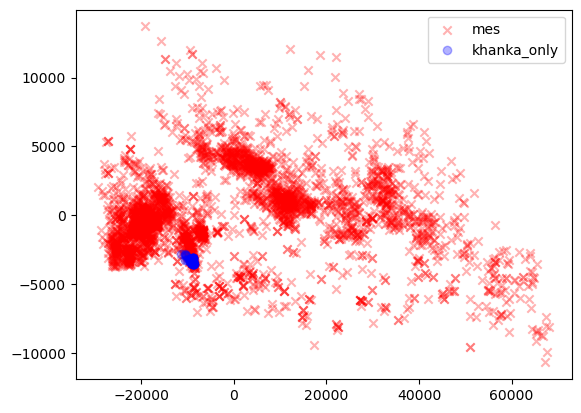

Explained coef ratio (PCA) for mes_khanka_only: [0.96602809 0.02049281]

Feature importances of all considered features:

et0_v3_yr = 0.057039331020343115
current_30arcsec_annualPET = 0.050826776425813645
wc2.1_30s_bio_15 = 0.04780875386768519
ai_v3_yr = 0.03983402626008174
wc2.1_30s_bio_2 = 0.03666407252313302
current_30arcsec_PETColdestQuarter = 0.034158024727333376
current_30arcsec_growingDegDays5 = 0.031090721632179734
wc2.1_30s_bio_10 = 0.02974477605913676
wc2.1_30s_bio_13 = 0.029599277925029668
wc2.1_30s_bio_7 = 0.02906116797105211
current_30arcsec_topoWet = 0.0282171896636775
current_30arcsec_continentality = 0.025811590170101244
current_30arcsec_embergerQ = 0.025676150367972828
wc2.1_30s_bio_19 = 0.02559586845929915
wc2.1_30s_bio_18 = 0.024801297361889914
current_30arcsec_thermicityIndex = 0.024326771828959624
wc2.1_30s_bio_9 = 0.02411634365698172
wc2.1_30s_elev = 0.02325590054640473
wc2.1_30s_bio_11 = 0.02120617333090894
wc2.1_30s_bio_16 = 0.020962082645860244
wc2.1_30s_bio_17 = 0.02092537260045749
wc2.1_30s_bio_12 = 0.02090013763285791
wc2.1_30s_bio_1 = 0.0208962268953595
wc2.1_30s_bio_6 = 0.019

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

current_30arcsec_annualPET: 0.07303777160029881
ai_v3_yr: 0.03886288792595222
wc2.1_30s_bio_2: 0.037806432399654616
wc2.1_30s_bio_13: 0.035690518758835145
et0_v3_yr: 0.034479252974609534
current_30arcsec_PETColdestQuarter: 0.033721806174712765
current_30arcsec_growingDegDays5: 0.031188402621679035
wc2.1_30s_bio_4: 0.030571424960793875
wc2.1_30s_bio_15: 0.030292424549879658
wc2.1_30s_bio_11: 0.030248713811761533
wc2.1_30s_bio_16: 0.02894574854086496
wc2.1_30s_bio_9: 0.027819560956183556
wc2.1_30s_bio_1: 0.02736562793930198
current_30arcsec_thermicityIndex: 0.026210346442134918
wc2.1_30s_bio_12: 0.025912063784741153
current_30arcsec_growingDegDays0: 0.025343696702798527
current_30arcsec_topoWet: 0.02523869420117477
current_30arcsec_embergerQ: 0.024640378429151618
wc2.1_30s_bio_10: 0.02392889397283094
wc2.1_30s_bio_3: 0.023507137908351544
wc2.1_30s_bio_6: 0.022511699629942743
wc2.1_30s_elev: 0.020702758381931155
current_30arcsec_continentality: 0.020352410728703443
wc2.1_30s_bio_5: 0.0197

Balanced accuracy estimation for the best feature subset:

[0.84862448 0.95247934 0.9084022  0.85881543 0.75      ]


Balanced accuracy estimation for all features in the experiment:

[0.79931224 0.90702479 0.86294766 0.90358127 0.75      ]


Datasets to compare: steppe, khanka_only

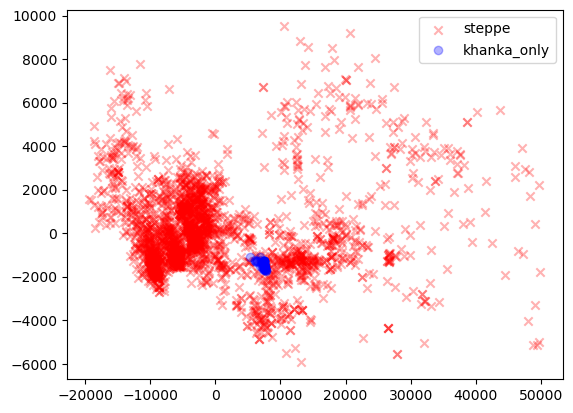

Explained coef ratio (PCA) for steppe_khanka_only: [0.9481379 0.02880706]

Feature importances of all considered features:

current_30arcsec_minTempWarmest = 0.06895480397357215
wc2.1_30s_bio_13 = 0.062082302452313866
wc2.1_30s_bio_6 = 0.057217704180248435
wc2.1_30s_bio_10 = 0.0518078773725461
wc2.1_30s_elev = 0.05075101277430999
wc2.1_30s_bio_18 = 0.03934485067834901
wc2.1_30s_bio_8 = 0.03868805699699328
wc2.1_30s_bio_15 = 0.03752933928595825
current_30arcsec_growingDegDays5 = 0.036864261957387734
current_30arcsec_aridityIndexThornthwaite = 0.03591616684087177
current_30arcsec_growingDegDays0 = 0.035279624699263525
wc2.1_30s_bio_4 = 0.034534114466477035
wc2.1_30s_bio_1 = 0.03225870778153148
ai_v3_yr = 0.030209781399759023
et0_v3_yr = 0.03014833827590092
wc2.1_30s_bio_3 = 0.02599192422845152
wc2.1_30s_bio_19 = 0.02584582772268518
wc2.1_30s_bio_17 = 0.02357180614672362
wc2.1_30s_bio_12 = 0.02327479290653863
wc2.1_30s_bio_11 = 0.022417223146547604
wc2.1_30s_bio_16 = 0.021433533657748652
wc2.1_30s_bio_9 = 0.021391895442352947
current_30arcsec_continentality = 0.01912746100385946
current_30arcsec_PETColdestQuar

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_bio_15: 0.3865578906054211
wc2.1_30s_elev: 0.32199861127324336
wc2.1_30s_bio_13: 0.2914434981213354


Balanced accuracy estimation for the best feature subset:

[1.   1.   1.   0.95 0.95]


Balanced accuracy estimation for all features in the experiment:

[1.   1.   1.   0.95 1.  ]


END OF COMPUTATIONS

In [75]:
analyze_all()

In [76]:
datasets = {
    'prim': data_prim,
    'khanka':data_khanka,
    'mes': data_mes,
    'steppe': data_steppe,
    'khanka_only': hanka_only,
    'checks': data_steppe_checks
}

for key, df in datasets.items():
    df.describe().to_csv(f'.\\stat\\{key}_stat.csv')

In [77]:
clf = RandomForestClassifier()
clf.fit(X, y)


RandomForestClassifier()